# Analyse results
Here we will analyze the first results of the experiments

## Data Loading
We load the data and merge the  different files. Furthermore, we rename the variables for ansatz, optimizer and featuremap to make the more user friendly.


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

from scipy.stats import friedmanchisquare,  wilcoxon, kruskal, mannwhitneyu

sns.set(font_scale=1.25)
sns.set(style='white', palette=None)

In [2]:
declare = True

res = []

for optimizer in ['cobyla', 'spsa', 'neldermead']:
    for preprocessing in ['pca', 'lda']:
        for init in ['uniform', 'normal', 'beta']:
            r = pd.read_csv("../reports/results/glass_identification_ibm_perth_{}_{}_{}_results.csv".format(optimizer, preprocessing, init), index_col=0)
            r['initialization'] = init

            res.append(r)

res = pd.concat(res)
res.head()

accuracy        f1         time   
index                                    
0      0.418605  0.399106  2924.215982  \
1      0.418605  0.383471  2226.927775   
2      0.325581  0.270071  2468.217853   
3      0.209302  0.196204  2763.111093   
4      0.186047  0.191430  3519.179496   

                                              ansatz   
index                                                  
0      <function get_efficientsu2 at 0x7f0b3342d9d0>  \
1      <function get_efficientsu2 at 0x7f0b3342d9d0>   
2      <function get_efficientsu2 at 0x7f0b3342d9d0>   
3      <function get_efficientsu2 at 0x7f0b3342d9d0>   
4      <function get_efficientsu2 at 0x7f0b3342d9d0>   

                                     optimizer   
index                                            
0      <function get_cobyla at 0x7f0b02dbf040>  \
1      <function get_cobyla at 0x7f0b02dbf040>   
2      <function get_cobyla at 0x7f0b02dbf040>   
3      <function get_cobyla at 0x7f0b02dbf040>   
4      <function get_cobyla at 0x7f0b02dbf040>   

                                          featuremap entanglement   
index                                                               
0       <function get_zfeaturemap at 0x7f0b3a0071f0>         full  \
1       <function get_zfeaturemap at 0x7f0b3a0071f0>       linear   
2       <function get_zfeaturemap at 0x7f0b3a0071f0>     circular   
3       <function get_zfeaturemap at 0x7f0b3a0071f0>          sca   
4      <function get_zzfeaturemap at 0x7f0b3a007280>         full   

      entanglement_featuremap  iterations preprocessing initialization  
index                                                                   
0                         NaN         233           pca        uniform  
1                         NaN         201           pca        uniform  
2                         NaN         223           pca        uniform  
3                         NaN         250           pca        uniform  
4                        full         186           pca        uniform

In [3]:
# if ansatz contains 'efficientsu2' replace with 'efficient_su2'
res['ansatz'] = res['ansatz'].apply(lambda x: 'efficient_su2' if 'efficientsu2' in x else x)
# if ansatz = 'paulitwodesign' replace with 'pauli_two_design'
res['ansatz'] = res['ansatz'].apply(lambda x: 'pauli_two_design' if 'paulitwodesign' in x else x)
# if ansatz = 'realamplitudes' replace with 'real_amplitudes'
res['ansatz'] = res['ansatz'].apply(lambda x: 'real_amplitudes' if 'realamplitudes' in x else x)
# if ansatz = 'twolocal' replace with 'two_local'
res['ansatz'] = res['ansatz'].apply(lambda x: 'two_local' if 'twolocal' in x else x)
# otherwise drop
res = res[res['ansatz'].isin(['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local'])]

In [4]:
# if optimizer contains 'cobyla' replace with 'cobyla'
res['optimizer'] = res['optimizer'].apply(lambda x: 'cobyla' if 'cobyla' in x else x)
# if optimizer = 'lbfgsb' replace with 'l_bfgs_b'
res['optimizer'] = res['optimizer'].apply(lambda x: 'spsa' if 'spsa' in x else x)
# if optimizer = 'neldermead' replace with 'nelder_mead'
res['optimizer'] = res['optimizer'].apply(lambda x: 'nelder_mead' if 'neldermead' in x else x)

In [5]:
# if feature_map = 'ZZFeatureMap' replace with 'zz'
res['featuremap'] = res['featuremap'].apply(lambda x: 'zz' if 'zzfeaturemap' in x else x)
# if feature_map = 'ZFeatureMap' replace with 'z'
res['featuremap'] = res['featuremap'].apply(lambda x: 'z' if 'zfeaturemap' in x else x)

In [6]:
res['noise'] = 'ibm_perth'

In [7]:
# consider configurations that are within 10% of the best configuration (accuracy)
best_configs = res[res['accuracy'] > max(res['accuracy']) - 0.1]

worst = res[res['accuracy'] < min(res['accuracy']) + 0.1]

index = ['ansatz', 'featuremap', 'entanglement', 'entanglement_featuremap', 'preprocessing', 'optimizer', 'initialization']

# remove column 'noise'
res = res.drop(columns=['noise'])

In [8]:
# sort by performance
res = res.sort_values(by=['f1', 'accuracy'], ascending=False).reset_index(drop=True)
res.head()

accuracy        f1         time            ansatz optimizer featuremap   
0  0.534884  0.519794   342.941381   real_amplitudes    cobyla         zz  \
1  0.488372  0.497865  3590.175614     efficient_su2    cobyla         zz   
2  0.511628  0.487010  1959.863808         two_local      spsa         zz   
3  0.511628  0.471676  1853.180420  pauli_two_design    cobyla          z   
4  0.488372  0.465653   503.353473         two_local      spsa          z   

  entanglement entanglement_featuremap  iterations preprocessing   
0          sca                circular         117           lda  \
1         full                    full         190           pca   
2          sca                  linear         201           pca   
3          NaN                     NaN         149           pca   
4     pairwise                     NaN         201           lda   

  initialization  
0           beta  
1           beta  
2           beta  
3         normal  
4         normal

In [9]:
res.tail()

accuracy        f1         time            ansatz    optimizer   
1507  0.046512  0.054264  4898.827139   real_amplitudes  nelder_mead  \
1508  0.046512  0.045102  1467.543207  pauli_two_design  nelder_mead   
1509  0.069767  0.026578  1055.691648         two_local  nelder_mead   
1510  0.046512  0.013658   891.176436   real_amplitudes  nelder_mead   
1511  0.000000  0.000000   947.449335     efficient_su2  nelder_mead   

     featuremap entanglement entanglement_featuremap  iterations   
1507          z          sca                     NaN         491  \
1508         zz          NaN                    full         419   
1509          z     circular                     NaN         430   
1510          z          sca                     NaN         357   
1511          z       linear                     NaN         349   

     preprocessing initialization  
1507           pca        uniform  
1508           lda           beta  
1509           lda           beta  
1510           lda           beta  
1511           lda           beta

## Optimizer
We first consider the optimizer.
* All in all, NelderMead by far the worst
* The three optimizers perform significantly different
* SPSA is significantly better than COBYLA
* But both SPSA and Cobyla are significantly better than Nelder-Mead

In [10]:
res.groupby(['optimizer']).agg({"accuracy":[np.mean, np.std], "f1":[np.mean, np.std]})

accuracy                  f1          
                 mean       std      mean       std
optimizer                                          
cobyla       0.279670  0.081652  0.268345  0.070100
nelder_mead  0.231082  0.075503  0.233628  0.070194
spsa         0.282900  0.082781  0.268926  0.073258

In [11]:
c = res[res['optimizer'] == 'cobyla'].set_index(index).sort_index()
n = res[res['optimizer'] == 'nelder_mead'].set_index(index).sort_index()
s = res[res['optimizer'] == 'spsa'].set_index(index).sort_index()

In [12]:
# Friedman test
print("Friedman: significantly different: ", friedmanchisquare(c['accuracy'], n['accuracy'], s['accuracy']).pvalue < 0.05)
# Wilcoxon
print("Wilcoxon: COBYLA and SPSA significantly different:", wilcoxon(c['accuracy'], s['accuracy']).pvalue < 0.05)
print("Wilcoxon: Cobyla significantly better than Nelder-Mead:", wilcoxon(c['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)
print("Wilcoxon: SPSA significantly better than Nelder-Mead:", wilcoxon(s['accuracy'], n['accuracy'], alternative='greater').pvalue < 0.05)

Friedman: significantly different:  True
Wilcoxon: COBYLA and SPSA significantly different: False
Wilcoxon: Cobyla significantly better than Nelder-Mead: True
Wilcoxon: SPSA significantly better than Nelder-Mead: True


In [13]:
best_configs.value_counts(['optimizer'])

optimizer  
spsa           22
cobyla         19
nelder_mead     3
Name: count, dtype: int64

## Ansatz
We now consider the ansatz parameter alone.
* Pauli Two Design: slightly worse performance in mean, but not significant
* Although best Pauli ocnfig is in place 3, a lot less are within the best configurations
* The ansatzes do not perform significantly different

In [14]:
# get first row and first row where ansatz =='pauli'
pd.concat([res.iloc[0:2, :].T, res[res['ansatz'] == 'pauli_two_design'].iloc[0]], axis=1).T

accuracy        f1         time            ansatz optimizer featuremap   
0  0.534884  0.519794   342.941381   real_amplitudes    cobyla         zz  \
1  0.488372  0.497865  3590.175614     efficient_su2    cobyla         zz   
3  0.511628  0.471676   1853.18042  pauli_two_design    cobyla          z   

  entanglement entanglement_featuremap iterations preprocessing initialization  
0          sca                circular        117           lda           beta  
1         full                    full        190           pca           beta  
3          NaN                     NaN        149           pca         normal

In [15]:
res.groupby(['ansatz']).agg({"accuracy":[np.mean, np.std, np.min, np.max], "f1":[np.mean, np.std]})

accuracy                                      f1          
                      mean       std      amin      amax      mean       std
ansatz                                                                      
efficient_su2     0.262059  0.079327  0.000000  0.488372  0.256318  0.069216
pauli_two_design  0.258613  0.089349  0.046512  0.511628  0.251232  0.079262
real_amplitudes   0.268088  0.086202  0.046512  0.534884  0.258145  0.076074
two_local         0.264901  0.083259  0.046512  0.511628  0.257688  0.072402

In [16]:
e = res[res['ansatz'] == 'efficient_su2']['accuracy']
p = res[res['ansatz'] == 'pauli_two_design']['accuracy']
r = res[res['ansatz'] == 'real_amplitudes']['accuracy']
t = res[res['ansatz'] == 'two_local']['accuracy']

In [17]:
# kruskal test as they are not paired
print("Ansatzes significantly different: ", kruskal(e, p, r, t).pvalue < 0.05)

Ansatzes significantly different:  False


In [18]:
best_configs.value_counts(['ansatz'], dropna=False).sort_index()

ansatz          
efficient_su2       11
pauli_two_design     5
real_amplitudes     13
two_local           15
Name: count, dtype: int64

## Ansatz Entanglement
* Hardly any big difference in mean
* Significance test shows no significant difference

In [19]:
res.groupby(['entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1                    
                  mean    median       std      mean    median       std
entanglement                                                            
circular      0.269093  0.267442  0.082748  0.260571  0.260248  0.071841
full          0.272538  0.279070  0.078491  0.263706  0.261898  0.068139
linear        0.265001  0.255814  0.077935  0.255273  0.253948  0.068734
pairwise      0.272825  0.255814  0.084994  0.263434  0.254292  0.074301
sca           0.250790  0.255814  0.090180  0.248070  0.244888  0.079710

In [20]:
c = res[res['entanglement'] == 'circular']['accuracy']
f = res[res['entanglement'] == 'full']['accuracy']
l = res[res['entanglement'] == 'linear']['accuracy']
p = res[res['entanglement'] == 'pairwise']['accuracy']
s = res[res['entanglement'] == 'sca']['accuracy']

In [21]:
# kruskal test as not paired
print("Entanglement significantly different:", kruskal(c,f,l,p,s).pvalue < 0.05)

for i, name in zip([c,f,l,p,s], ['circular', 'full', 'linear', 'pairwise', 'sca']):
    for j, name2 in zip([c,f,l,p,s], ['circular', 'full', 'linear', 'pairwise', 'sca']):
        if name != name2:
            if mannwhitneyu(i, j, alternative='greater').pvalue < 0.05:
                print(f"{name} significantly better than {name2}:", mannwhitneyu(i, j, alternative='greater').pvalue < 0.05)

Entanglement significantly different: True
circular significantly better than sca: True
full significantly better than sca: True
linear significantly better than sca: True
pairwise significantly better than sca: True


In [22]:
best_configs.value_counts(['entanglement'], dropna=False).sort_index()

entanglement
circular         8
full            11
linear           4
pairwise         5
sca             11
NaN              5
Name: count, dtype: int64

## Ansatz combined with ansatz entanglement
* In mean, does not show too much.
* Significance test shows that there are no significant differences in entanglement for any ansatz

In [23]:
res.groupby(['ansatz', 'entanglement']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1   
                                  mean    median       std      mean   
ansatz          entanglement                                           
efficient_su2   circular      0.268734  0.255814  0.077708  0.260181  \
                full          0.263997  0.255814  0.077250  0.259114   
                linear        0.257321  0.255814  0.081078  0.251646   
                sca           0.258183  0.255814  0.081740  0.254331   
real_amplitudes circular      0.272825  0.279070  0.087109  0.262423   
                full          0.277562  0.279070  0.077116  0.264710   
                linear        0.268734  0.267442  0.083174  0.254571   
                sca           0.253230  0.255814  0.095613  0.250878   
two_local       circular      0.265719  0.267442  0.083772  0.259109   
                full          0.276055  0.279070  0.081067  0.267296   
                linear        0.268949  0.279070  0.068949  0.259602   
                pairwise      0.272825  0.255814  0.084994  0.263434   
                sca           0.240956  0.232558  0.092558  0.239001   

                                                  
                                median       std  
ansatz          entanglement                      
efficient_su2   circular      0.257450  0.065638  
                full          0.261445  0.065749  
                linear        0.247421  0.073914  
                sca           0.252737  0.071791  
real_amplitudes circular      0.274156  0.075490  
                full          0.266480  0.069422  
                linear        0.254311  0.071710  
                sca           0.242034  0.086733  
two_local       circular      0.258658  0.074614  
                full          0.261752  0.069556  
                linear        0.259733  0.060190  
                pairwise      0.254292  0.074301  
                sca           0.236099  0.079831

In [24]:
for ansatz in ['efficient_su2', 'real_amplitudes', 'two_local']:
    e = res[res['ansatz']==ansatz]
    e_c = e[e['entanglement'] == 'circular'].set_index(index).sort_index()['accuracy']
    e_f = e[e['entanglement'] == 'full'].set_index(index).sort_index()['accuracy']
    e_l = e[e['entanglement'] == 'linear'].set_index(index).sort_index()['accuracy']
    e_s = e[e['entanglement'] == 'sca'].set_index(index).sort_index()['accuracy']

    if ansatz == 'two_local':
        e_p = e[e['entanglement'] == 'pairwise'].set_index(index).sort_index()['accuracy']
        sign = friedmanchisquare(e_c, e_f, e_l, e_s, e_p).pvalue < 0.05
        print(f"{ansatz} significantly different entanglement:", sign)

        if sign:
            for ent in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                for ent2 in ['circular', 'full', 'linear', 'sca', 'pairwise']:
                    if ent != ent2:
                        sign = wilcoxon(e[e['entanglement'] == ent]['accuracy'], e[e['entanglement'] == ent2]['accuracy'], alternative='greater').pvalue < 0.05
                        if sign:
                            print(f"{ansatz}: {ent} significantly better than {ent2}: ", sign)

    else:
        print(f"{ansatz} significantly different entanglement:", friedmanchisquare(e_c, e_f, e_l, e_s).pvalue < 0.05)

efficient_su2 significantly different entanglement: False
real_amplitudes significantly different entanglement: False
two_local significantly different entanglement: True
two_local: circular significantly better than sca:  True
two_local: full significantly better than circular:  True
two_local: full significantly better than sca:  True
two_local: linear significantly better than sca:  True
two_local: pairwise significantly better than sca:  True


In [25]:
best_configs.value_counts(['ansatz', 'entanglement'], dropna=False).sort_index()

ansatz            entanglement
efficient_su2     circular        2
                  full            3
                  linear          2
                  sca             4
pauli_two_design  NaN             5
real_amplitudes   circular        3
                  full            3
                  linear          2
                  sca             5
two_local         circular        3
                  full            5
                  pairwise        5
                  sca             2
Name: count, dtype: int64

## Feature Map
* ZFeatureMap is significantly better than ZZFeatureMap, but best configs almost all use ZZ because ZZ with beta is so much better
* But, ZZFeatureMap performs very good with beta initialization

In [26]:
res.groupby(['featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1                    
                mean    median       std      mean    median       std
featuremap                                                            
z           0.313123  0.325581  0.091584  0.271192  0.268059  0.083327
zz          0.254836  0.255814  0.078198  0.254121  0.252898  0.070500

In [27]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                               mean    median       std      mean    median   
featuremap initialization                                                     
z          beta            0.328627  0.348837  0.096177  0.233522  0.228483  \
           normal          0.296788  0.302326  0.089206  0.282597  0.271075   
           uniform         0.313953  0.325581  0.087426  0.297457  0.301730   
zz         beta            0.297010  0.302326  0.088151  0.280868  0.280948   
           normal          0.236268  0.232558  0.065050  0.243194  0.244919   
           uniform         0.231229  0.232558  0.060701  0.238301  0.237556   

                                     
                                std  
featuremap initialization            
z          beta            0.080794  
           normal          0.078507  
           uniform         0.077721  
zz         beta            0.078809  
           normal          0.063598  
           uniform         0.059926

In [28]:
z = res[res['featuremap'] == 'z']['accuracy']
zz = res[res['featuremap'] == 'zz']['accuracy']

In [29]:
print("Z significantly better than ZZFeatureMap:", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

Z significantly better than ZZFeatureMap: True


In [30]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()

featuremap
z             18
zz            26
Name: count, dtype: int64

In [31]:
best_configs.value_counts(['featuremap'], dropna=False).sort_index()/res.value_counts(['featuremap'], dropna=False).sum()

featuremap
z             0.011905
zz            0.017196
Name: count, dtype: float64

## Feature Entanglement
* linear outperforms all but pairwise significantly, pairwise outperforms full
* Notably, full is a lot less represented among the best ones

In [32]:
res.groupby(['entanglement_featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                             mean    median       std      mean    median   
entanglement_featuremap                                                     
circular                 0.258767  0.255814  0.081464  0.257627  0.252019  \
full                     0.251569  0.255814  0.071996  0.253133  0.251855   
linear                   0.255722  0.255814  0.075920  0.253792  0.258213   
pairwise                 0.253784  0.255814  0.078062  0.253240  0.255329   
sca                      0.254337  0.255814  0.083463  0.252813  0.250342   

                                   
                              std  
entanglement_featuremap            
circular                 0.073858  
full                     0.066886  
linear                   0.067558  
pairwise                 0.068739  
sca                      0.075474

In [33]:
c = res[res['entanglement_featuremap'] == 'circular']['accuracy']
f = res[res['entanglement_featuremap'] == 'full']['accuracy']
l = res[res['entanglement_featuremap'] == 'linear']['accuracy']
p = res[res['entanglement_featuremap'] == 'pairwise']['accuracy']
s = res[res['entanglement_featuremap'] == 'sca']['accuracy']

print('Entanglement significantly different:', kruskal(c,f,l,p,s).pvalue < 0.05)

for ent in ['circular', 'full', 'linear', 'pairwise', 'sca']:
    e = res[res['entanglement_featuremap'] == ent]
    for ent2 in ['circular', 'full', 'linear', 'pairwise', 'sca']:
        if ent != ent2:
            e2 = res[res['entanglement_featuremap'] == ent2]
            sign = mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05
            if sign:
                print(f"{ent} significantly better than {ent2}:", mannwhitneyu(e['accuracy'], e2['accuracy'], alternative='greater').pvalue < 0.05)

Entanglement significantly different: False


In [34]:
best_configs.value_counts(['entanglement_featuremap'], dropna=False).sort_index()

entanglement_featuremap
circular                    6
full                        3
linear                      3
pairwise                    7
sca                         7
NaN                        18
Name: count, dtype: int64

## Ansatz and feature map
* Results do not differ too much - ZFeatureMap is significantly better than ZZFeatureMap for all ansatzes

In [35]:
res.groupby(['ansatz', 'featuremap']).agg({"accuracy": [np.mean, np.median, np.std], "f1": [np.mean, np.median, np.std]})

accuracy                            f1             
                                 mean    median       std      mean    median   
ansatz           featuremap                                                     
efficient_su2    z           0.310401  0.325581  0.084363  0.272909  0.263772  \
                 zz          0.252390  0.255814  0.074732  0.253000  0.250832   
pauli_two_design z           0.324289  0.337209  0.093185  0.289820  0.268570   
                 zz          0.245478  0.255814  0.083021  0.243514  0.249260   
real_amplitudes  z           0.314922  0.325581  0.094319  0.263818  0.274505   
                 zz          0.258721  0.255814  0.081447  0.257011  0.256184   
two_local        z           0.311628  0.325581  0.095842  0.271992  0.263826   
                 zz          0.255556  0.255814  0.077302  0.254828  0.252783   

                                       
                                  std  
ansatz           featuremap            
efficient_su2    z           0.076588  
                 zz          0.067270  
pauli_two_design z           0.094336  
                 zz          0.074107  
real_amplitudes  z           0.081770  
                 zz          0.074952  
two_local        z           0.088042  
                 zz          0.068609

In [36]:
for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    f = res[res['ansatz'] == ansatz]
    z = f[f['featuremap'] == 'z'].set_index(index).sort_index()['accuracy']
    zz = f[f['featuremap'] == 'zz'].set_index(index).sort_index()['accuracy']

    print(f"{ansatz}: Z significantly better than ZZ", mannwhitneyu(z, zz, alternative='greater').pvalue < 0.05)

efficient_su2: Z significantly better than ZZ True
pauli_two_design: Z significantly better than ZZ True
real_amplitudes: Z significantly better than ZZ True
two_local: Z significantly better than ZZ True


In [37]:
best_configs.value_counts(['ansatz', 'featuremap'], dropna=False).sort_index()

ansatz            featuremap
efficient_su2     z             3
                  zz            8
pauli_two_design  z             2
                  zz            3
real_amplitudes   z             6
                  zz            7
two_local         z             7
                  zz            8
Name: count, dtype: int64

## Preprocessing
* PCA significantly better than LDA

In [38]:
res.groupby(['preprocessing']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                   mean       std      mean       std
preprocessing                                        
lda            0.280423  0.080709  0.264996  0.070828
pca            0.248677  0.083137  0.248936  0.074376

In [39]:
p = res[res['preprocessing']=='pca'].set_index(index).sort_index()['accuracy']
l = res[res['preprocessing']=='lda'].set_index(index).sort_index()['accuracy']

In [40]:
print("PCA significantly wprse than LDA: ", wilcoxon(p, l, alternative='less').pvalue < 0.05)

PCA significantly wprse than LDA:  True


In [41]:
best_configs.value_counts(['preprocessing'], dropna=False)

preprocessing
lda              32
pca              12
Name: count, dtype: int64

## Initialization
* Beta works better in mean but also has higher std
* Beta init really improves lda results
* Beta also really improves SPSA and COBYLA results, not too much for Nelder-Mead

In [42]:
res.groupby(['initialization'], dropna=False).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                    mean       std      mean       std
initialization                                        
beta            0.302279  0.090213  0.272977  0.081011
normal          0.246355  0.073128  0.249761  0.067841
uniform         0.245017  0.072684  0.248160  0.066896

In [43]:
b = res[res['initialization']=='beta'].set_index(index).sort_index()['accuracy']
r = res[res['initialization']=='uniform'].set_index(index).sort_index()['accuracy']
n = res[res['initialization']=='normal'].set_index(index).sort_index()['accuracy']

In [44]:
print("Significant Differences:", friedmanchisquare(b,r,n).pvalue < 0.05)
print("Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
print("Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
print("Uniform significantly different from Normal:", wilcoxon(r, n).pvalue < 0.05)

Significant Differences: True
Beta significantly better than Uniform: True
Beta significantly better than Normal: True
Uniform significantly different from Normal: False


In [45]:
best_configs.value_counts(['initialization'], dropna=False)

initialization
beta              33
normal             6
uniform            5
Name: count, dtype: int64

### Intialization X Optimizer
Significant differences for COBYLA and SPSA, but not for Nelder-Mead.

In [46]:
res.groupby(['optimizer', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                mean       std      mean       std
optimizer   initialization                                        
cobyla      beta            0.335133  0.072402  0.296027  0.073078
            normal          0.248200  0.070045  0.251579  0.063383
            uniform         0.255676  0.072544  0.257428  0.065342
nelder_mead beta            0.233527  0.086056  0.225601  0.074957
            normal          0.235188  0.067977  0.243016  0.066358
            uniform         0.224529  0.071260  0.232267  0.068289
spsa        beta            0.338178  0.068755  0.297302  0.073621
            normal          0.255676  0.079773  0.254689  0.073266
            uniform         0.254845  0.070269  0.254786  0.064508

In [47]:
for optimizer in pd.unique(res['optimizer']):
    res_opt = res[res['optimizer'] == optimizer]
    n = res_opt[res_opt['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_opt[res_opt['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_opt[res_opt['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{optimizer}: Significant Differences:", sign)
    if sign:
        print(f"{optimizer}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{optimizer}: Uniform significantly better than Normal:", wilcoxon(r, n, alternative='greater').pvalue < 0.05)


cobyla: Significant Differences: True
cobyla: Beta significantly better than Uniform: True
cobyla: Beta significantly better than Normal: True
cobyla: Uniform significantly better than Normal: False
spsa: Significant Differences: True
spsa: Beta significantly better than Uniform: True
spsa: Beta significantly better than Normal: True
spsa: Uniform significantly better than Normal: False
nelder_mead: Significant Differences: False


### Initialization X Ansatz
Significant differences for all ansatzes. Beta outperforms both others on all ansatzes, no significant differences between normal and uniform otherwise.

In [48]:
res.groupby(['ansatz', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                     mean       std      mean       std
ansatz           initialization                                        
efficient_su2    beta            0.300226  0.089792  0.274765  0.078303
                 normal          0.242733  0.061173  0.247655  0.058302
                 uniform         0.243217  0.070435  0.246534  0.066290
pauli_two_design beta            0.288760  0.098568  0.254295  0.085318
                 normal          0.240310  0.084126  0.248837  0.078025
                 uniform         0.246770  0.078674  0.250564  0.076310
real_amplitudes  beta            0.307171  0.094150  0.273174  0.086747
                 normal          0.250323  0.077057  0.252166  0.071310
                 uniform         0.246770  0.072668  0.249096  0.066982
two_local        beta            0.302713  0.085949  0.275125  0.077659
                 normal          0.247287  0.076675  0.249708  0.070401
                 uniform         0.244703  0.073806  0.248232  0.065863

In [49]:
for ansatz in pd.unique(res['ansatz']):
    res_ans = res[res['ansatz'] == ansatz]
    n = res_ans[res_ans['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ans[res_ans['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ans[res_ans['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ansatz}: Significant Differences:", sign)
    if sign:
        print(f"{ansatz}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ansatz}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

real_amplitudes: Significant Differences: True
real_amplitudes: Beta significantly better than Uniform: True
real_amplitudes: Beta significantly better than Normal: True
real_amplitudes: Normal and Uniform significantly different: False
efficient_su2: Significant Differences: True
efficient_su2: Beta significantly better than Uniform: True
efficient_su2: Beta significantly better than Normal: True
efficient_su2: Normal and Uniform significantly different: False
two_local: Significant Differences: True
two_local: Beta significantly better than Uniform: True
two_local: Beta significantly better than Normal: True
two_local: Normal and Uniform significantly different: False
pauli_two_design: Significant Differences: False


### Initialization X Ansatz Entanglement
Significant differences for all entanglement strategies. Beta outperforms bot hohters on all strategies significantly, no difference between uniform and normal for any strategy.

In [50]:
res.groupby(['entanglement', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                 mean       std      mean       std
entanglement initialization                                        
circular     beta            0.308786  0.090200  0.280261  0.080832
             normal          0.245478  0.069319  0.245492  0.061010
             uniform         0.253015  0.072901  0.255960  0.068423
full         beta            0.306202  0.086812  0.275201  0.075643
             normal          0.261628  0.071811  0.265252  0.066468
             uniform         0.249785  0.064173  0.250666  0.059736
linear       beta            0.296512  0.084965  0.262357  0.076939
             normal          0.244832  0.067106  0.248107  0.063686
             uniform         0.253661  0.071204  0.255355  0.064679
pairwise     beta            0.308140  0.081205  0.280315  0.074220
             normal          0.260982  0.085783  0.258151  0.078488
             uniform         0.249354  0.078346  0.251837  0.068906
sca          beta            0.300172  0.099306  0.277869  0.090336
             normal          0.230620  0.073343  0.237706  0.070702
             uniform         0.221576  0.074664  0.228634  0.068078

In [51]:
for entanglement in pd.unique(res['entanglement']):
    if entanglement is np.nan:
        continue
    res_ent = res[res['entanglement'] == entanglement]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{entanglement}: Significant Differences:", sign)
    if sign:
        print(f"{entanglement}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{entanglement}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False
circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False

/home/sabrina/Documents/Conferences/SIAM 2024/code/venv/lib64/python3.11/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


### Initialization X FeatureMap
Beta significantly better for both feature maps. No significant differences for uniform and normal otherwise.

In [52]:
res.groupby(['featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                               mean       std      mean       std
featuremap initialization                                        
z          beta            0.328627  0.096177  0.233522  0.080794
           normal          0.296788  0.089206  0.282597  0.078507
           uniform         0.313953  0.087426  0.297457  0.077721
zz         beta            0.297010  0.088151  0.280868  0.078809
           normal          0.236268  0.065050  0.243194  0.063598
           uniform         0.231229  0.060701  0.238301  0.059926

In [53]:
for featmap in pd.unique(res['featuremap']):
    res_fm = res[res['featuremap'] == featmap]
    n = res_fm[res_fm['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_fm[res_fm['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_fm[res_fm['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{featmap}: Significant Differences:", sign)
    if sign:
        print(f"{featmap}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{featmap}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

zz: Significant Differences: True
zz: Beta significantly better than Uniform: True
zz: Beta significantly better than Normal: True
zz: Normal and Uniform significantly different: False
z: Significant Differences: True
z: Beta significantly better than Uniform: True
z: Beta significantly better than Normal: True
z: Normal and Uniform significantly different: False


### Initialization X FeatureMap Entanglement
Beta outperforms all others on all entanglement strategies. No significant differences between normal and uniform on any other task.

In [54]:
res.groupby(['entanglement_featuremap', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                            mean       std      mean       std
entanglement_featuremap initialization                                        
circular                beta            0.311185  0.092525  0.293436  0.084138
                        normal          0.235880  0.059881  0.242272  0.059598
                        uniform         0.229236  0.061066  0.237172  0.062493
full                    beta            0.276024  0.082065  0.268484  0.076331
                        normal          0.241694  0.064073  0.248529  0.061128
                        uniform         0.236988  0.062577  0.242387  0.059909
linear                  beta            0.288483  0.085514  0.268512  0.075322
                        normal          0.245847  0.065209  0.252217  0.062184
                        uniform         0.232835  0.064426  0.240646  0.062172
pairwise                beta            0.302326  0.088279  0.285529  0.076961
                        normal          0.231174  0.064208  0.240185  0.064586
                        uniform         0.227852  0.054124  0.234006  0.050918
sca                     beta            0.307032  0.089290  0.288378  0.079389
                        normal          0.226744  0.071097  0.232767  0.069718
                        uniform         0.229236  0.061808  0.237294  0.064284

In [55]:
for ent in pd.unique(res['entanglement_featuremap']):
    if ent is np.nan:
        continue
    res_ent = res[res['entanglement_featuremap'] == ent]
    n = res_ent[res_ent['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_ent[res_ent['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_ent[res_ent['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{ent}: Significant Differences:", sign)
    if sign:
        print(f"{ent}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{ent}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

circular: Significant Differences: True
circular: Beta significantly better than Uniform: True
circular: Beta significantly better than Normal: True
circular: Normal and Uniform significantly different: False
full: Significant Differences: True
full: Beta significantly better than Uniform: True
full: Beta significantly better than Normal: True
full: Normal and Uniform significantly different: False
linear: Significant Differences: True
linear: Beta significantly better than Uniform: True
linear: Beta significantly better than Normal: True
linear: Normal and Uniform significantly different: False
sca: Significant Differences: True
sca: Beta significantly better than Uniform: True
sca: Beta significantly better than Normal: True
sca: Normal and Uniform significantly different: False
pairwise: Significant Differences: True
pairwise: Beta significantly better than Uniform: True
pairwise: Beta significantly better than Normal: True
pairwise: Normal and Uniform significantly different: False

### Initialization X Preprocessing
Significant differences for both preprocessing techniques. Beta outperforms both others for both methods, no significant differences between the others. But Beta peforms a lot better on LDA data than PCA (10\% in mean!).

In [56]:
res.groupby(['preprocessing', 'initialization']).agg({"accuracy": [np.mean, np.std], "f1": [np.mean, np.std]})

accuracy                  f1          
                                  mean       std      mean       std
preprocessing initialization                                        
lda           beta            0.319214  0.087854  0.281345  0.081374
              normal          0.264581  0.067062  0.260652  0.061757
              uniform         0.257475  0.071321  0.252990  0.064977
pca           beta            0.285345  0.089525  0.264608  0.079932
              normal          0.228128  0.074514  0.238871  0.071910
              uniform         0.232558  0.072032  0.243331  0.068551

In [57]:
for preprocessing in pd.unique(res['preprocessing']):
    res_pre = res[res['preprocessing'] == preprocessing]
    n = res_pre[res_pre['initialization'] == 'normal'].set_index(index).sort_index()['accuracy']
    b = res_pre[res_pre['initialization'] == 'beta'].set_index(index).sort_index()['accuracy']
    r = res_pre[res_pre['initialization'] == 'uniform'].set_index(index).sort_index()['accuracy']

    sign = friedmanchisquare(b,r,n).pvalue < 0.05
    print(f"{preprocessing}: Significant Differences:", sign)
    if sign:
        print(f"{preprocessing}: Beta significantly better than Uniform:", wilcoxon(b,r, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Beta significantly better than Normal:", wilcoxon(b,n, alternative='greater').pvalue < 0.05)
        print(f"{preprocessing}: Normal and Uniform significantly different:", wilcoxon(n,r).pvalue < 0.05)

lda: Significant Differences: True
lda: Beta significantly better than Uniform: True
lda: Beta significantly better than Normal: True
lda: Normal and Uniform significantly different: False
pca: Significant Differences: True
pca: Beta significantly better than Uniform: True
pca: Beta significantly better than Normal: True
pca: Normal and Uniform significantly different: False


## Plot the Results

In [58]:
res_better = res

### Time X Optimizer and Initialization

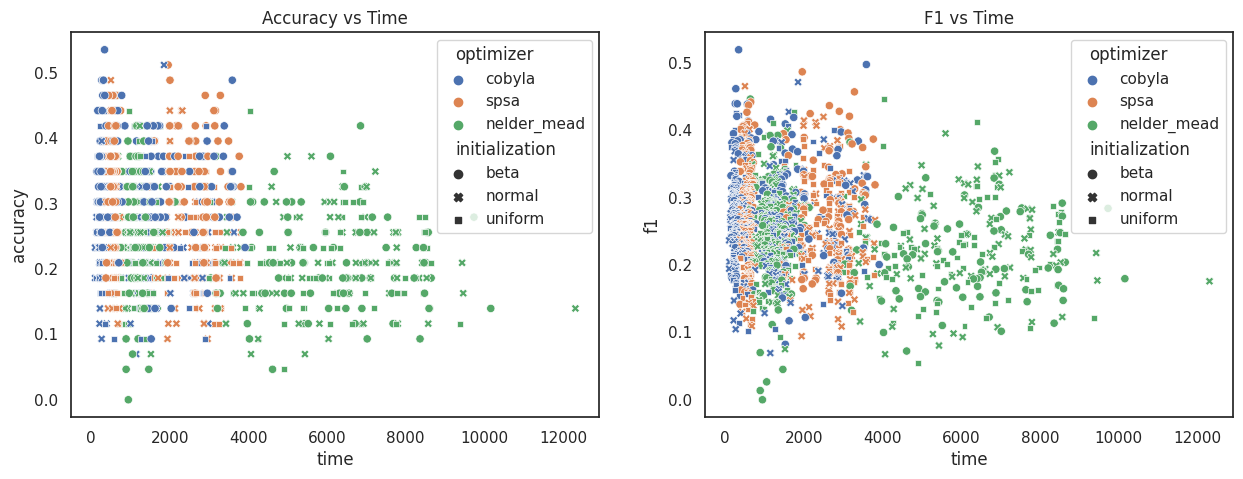

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='optimizer', style='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='optimizer', style='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [60]:
cob_runtime = res[res['optimizer']=='cobyla'].set_index(index).sort_index()['time']
spsa_runtime = res[res['optimizer']=='spsa'].set_index(index).sort_index()['time']
nelder_runtime = res[res['optimizer']=='nelder_mead'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", kruskal(cob_runtime, spsa_runtime, nelder_runtime).pvalue < 0.05)

print("COBYLA significantly shorter than SPSA", wilcoxon(cob_runtime, spsa_runtime, alternative='less').pvalue < 0.05)
print("COBYLA significantly shorter than Nelder-Mead", wilcoxon(cob_runtime, nelder_runtime, alternative='less').pvalue < 0.05)
print("SPSA significantly shorter than Nelder-Mead", wilcoxon(spsa_runtime, nelder_runtime, alternative='less').pvalue < 0.05)

Significant Differences: True
COBYLA significantly shorter than SPSA True
COBYLA significantly shorter than Nelder-Mead True
SPSA significantly shorter than Nelder-Mead True


### Ansatz

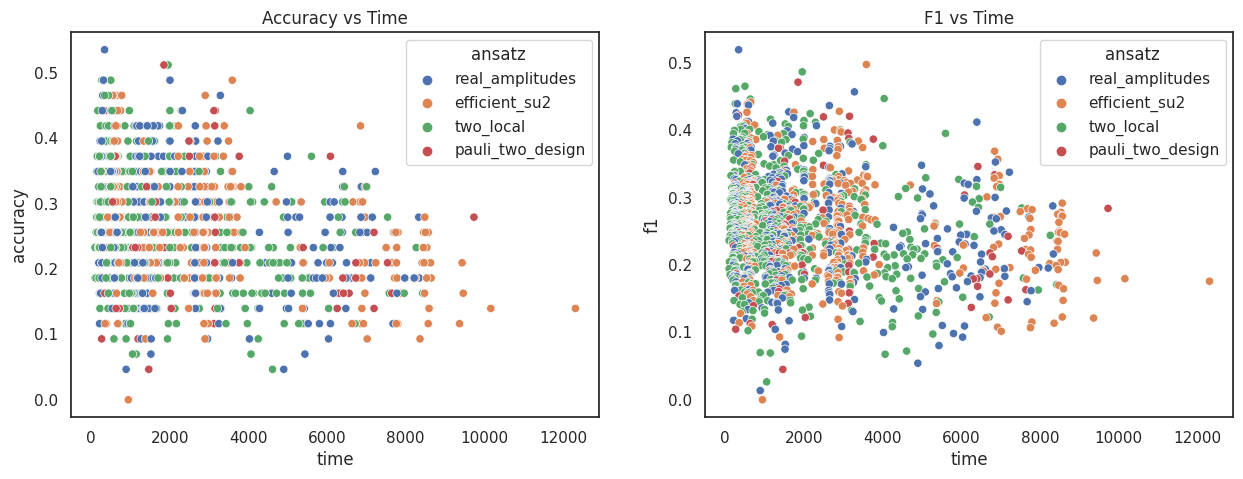

In [61]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='ansatz', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='ansatz', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [62]:
eff_runtime = res[res['ansatz']=='efficient_su2']['time']
pauli_runtime = res[res['ansatz']=='pauli_two_design']['time']
real_runtime = res[res['ansatz']=='real_amplitudes']['time']
two_runtime = res[res['ansatz']=='two_local']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(eff_runtime, pauli_runtime, real_runtime, two_runtime).pvalue < 0.05)

for ansatz in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
    for ansatz2 in ['efficient_su2', 'pauli_two_design', 'real_amplitudes', 'two_local']:
        if ansatz != ansatz2:
            sign = mannwhitneyu(res[res['ansatz']==ansatz]['time'], res[res['ansatz']==ansatz2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{ansatz}: significantly shorter than {ansatz2}", sign)

Significant Differences: True
pauli_two_design: significantly shorter than efficient_su2 True
real_amplitudes: significantly shorter than efficient_su2 True
two_local: significantly shorter than efficient_su2 True
two_local: significantly shorter than pauli_two_design True
two_local: significantly shorter than real_amplitudes True


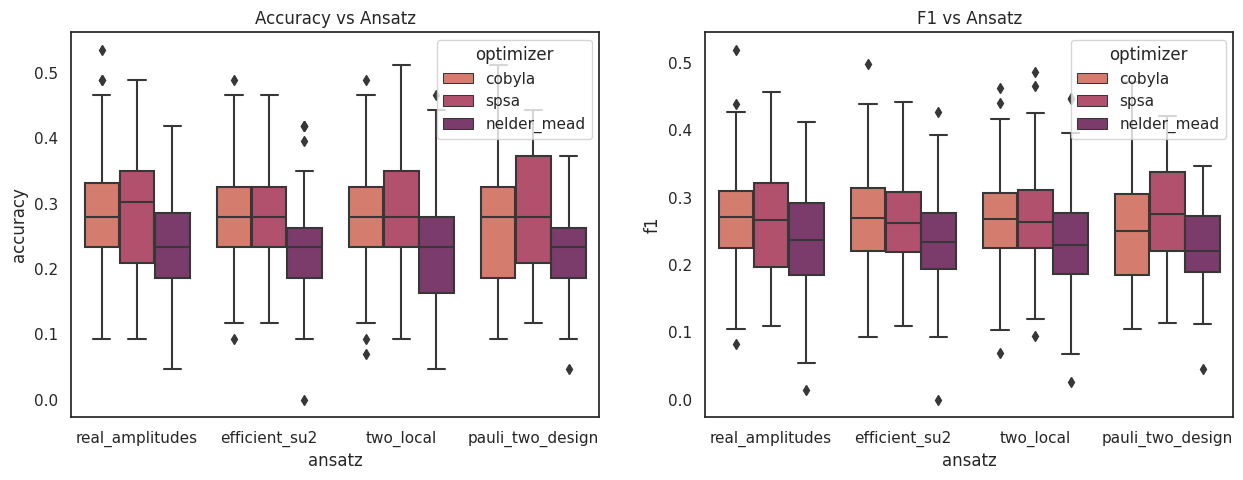

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

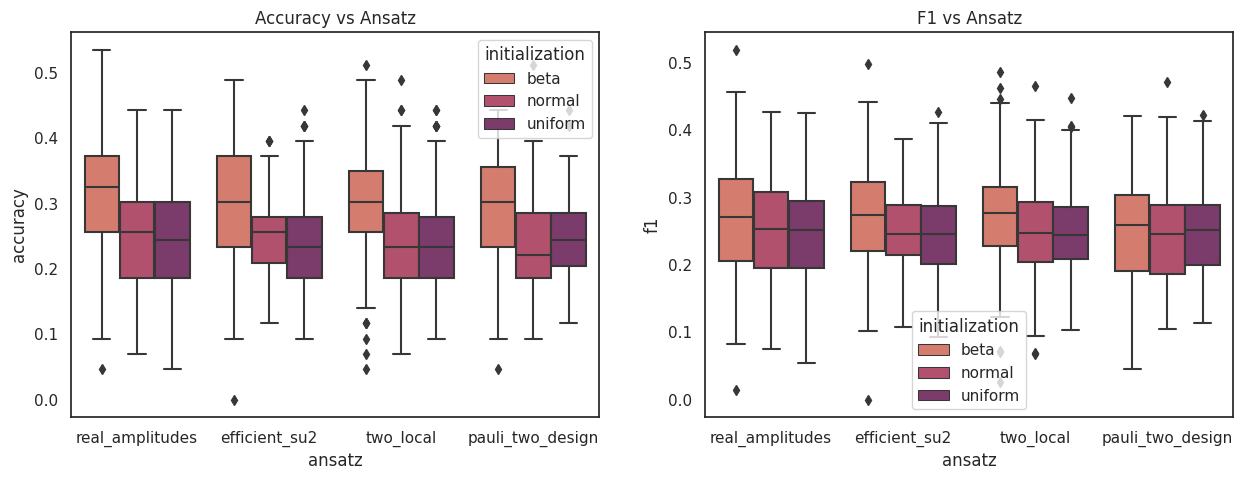

In [64]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='ansatz', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='ansatz', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Ansatz')
ax[1].set_title('F1 vs Ansatz')
plt.show()

### FeatureMap

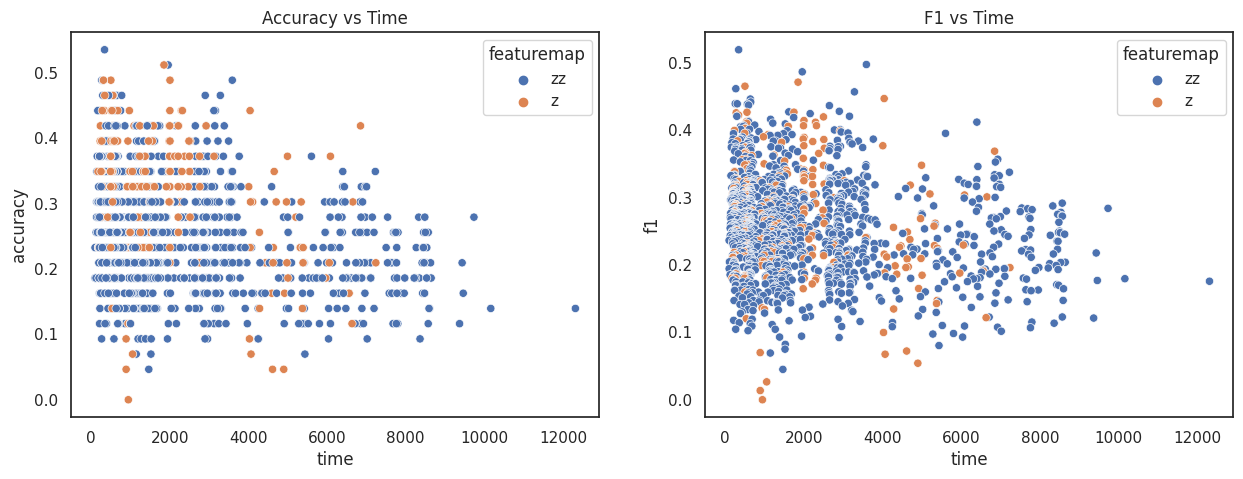

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [66]:
z_runtime = res[res['featuremap']=='z']['time']
zz_runtime = res[res['featuremap']=='zz']['time']

# significant differences in runtime
print("Z runtime significantly different from ZZFeatureMap:", mannwhitneyu(z_runtime, zz_runtime).pvalue < 0.05)

Z runtime significantly different from ZZFeatureMap: False


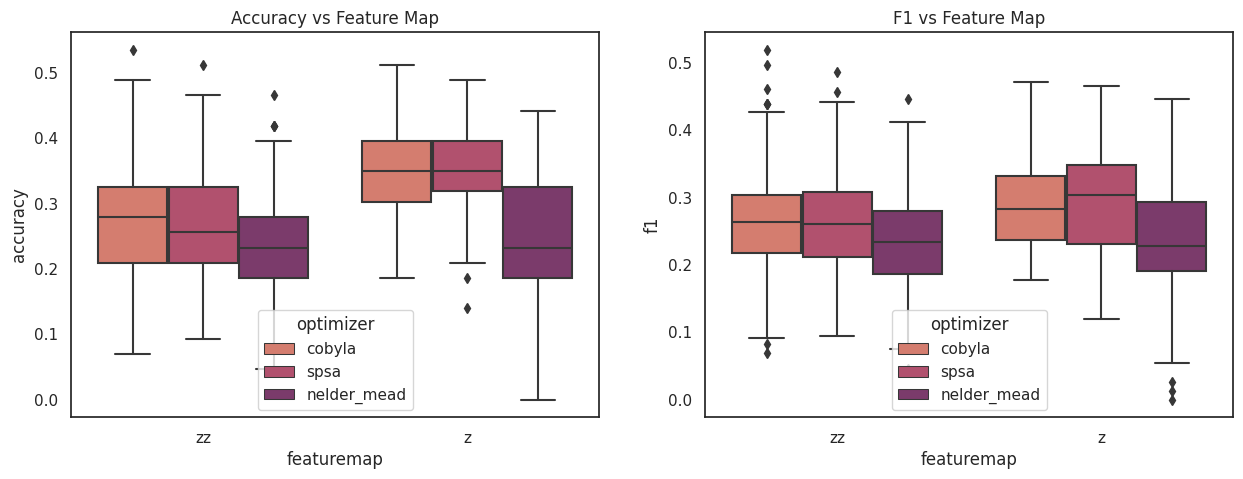

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

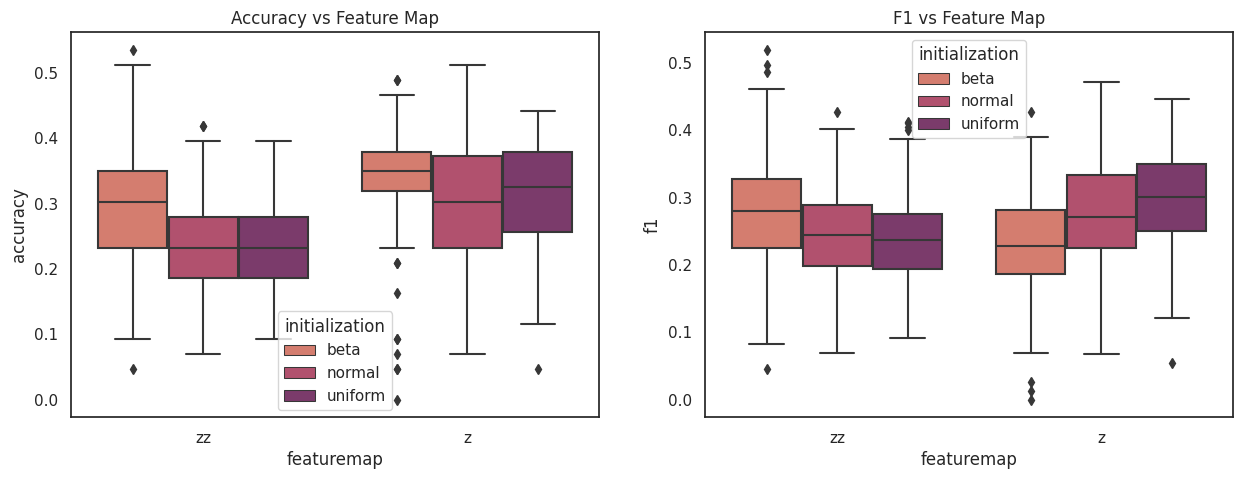

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map')
ax[1].set_title('F1 vs Feature Map')
plt.show()

### Ansatz Entanglement

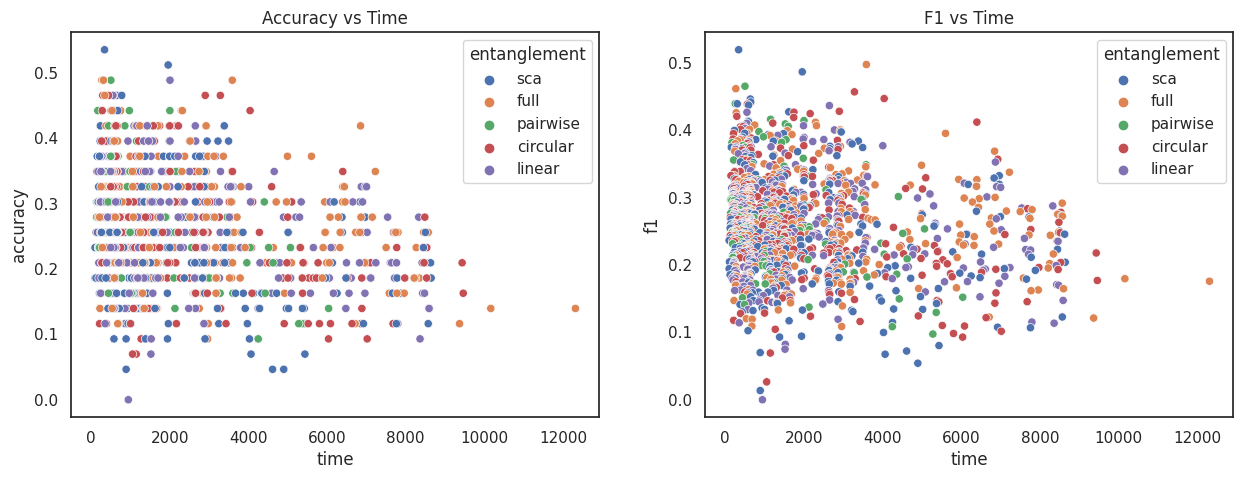

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [70]:
sca_runtime = res[res['entanglement']=='sca']['time']
full_runtime = res[res['entanglement']=='full']['time']
circular_runtime = res[res['entanglement']=='circular']['time']
linear_runtime = res[res['entanglement']=='linear']['time']
pairwise_runtime = res[res['entanglement']=='pairwise']['time']

# significant differences in runtime
print("Significant Differences:", kruskal(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = mannwhitneyu(res[res['entanglement']==entanglement1]['time'], res[res['entanglement']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True
pairwise: significantly shorter than sca True
pairwise: significantly shorter than full True
pairwise: significantly shorter than circular True
pairwise: significantly shorter than linear True


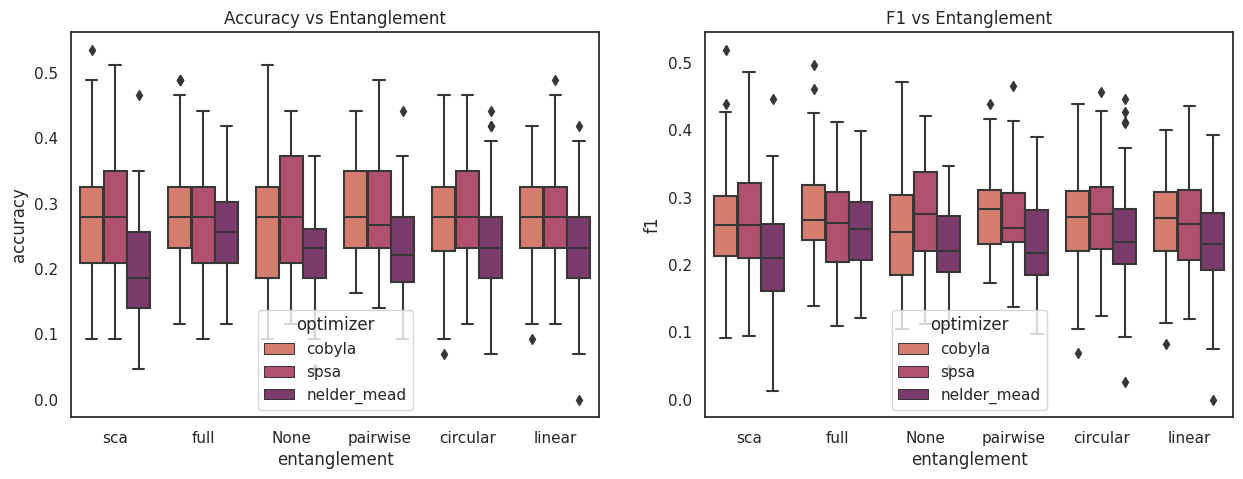

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

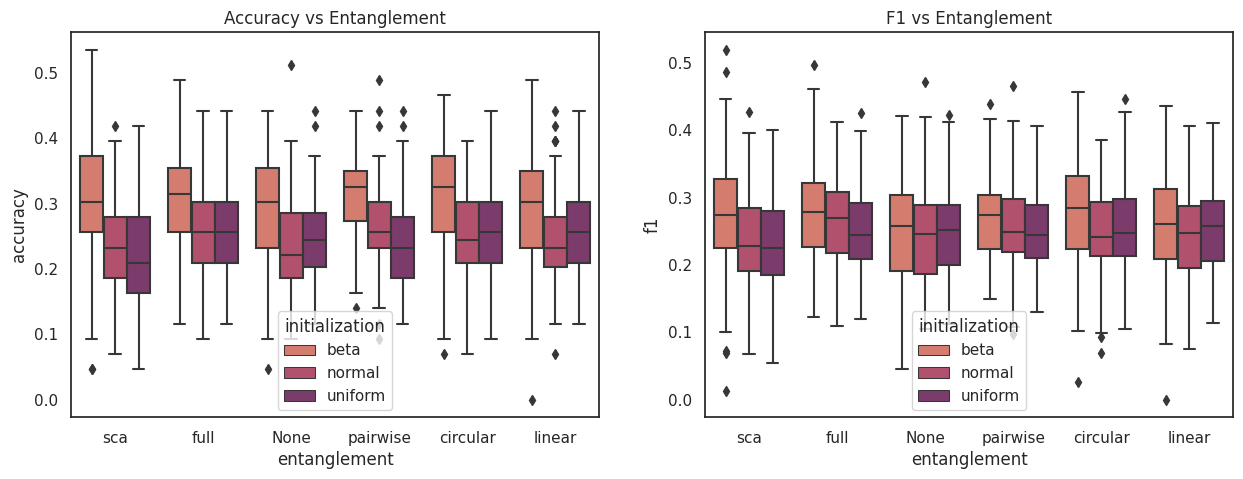

In [72]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Entanglement')
ax[1].set_title('F1 vs Entanglement')
plt.show()

### FeatureMap Entanglement

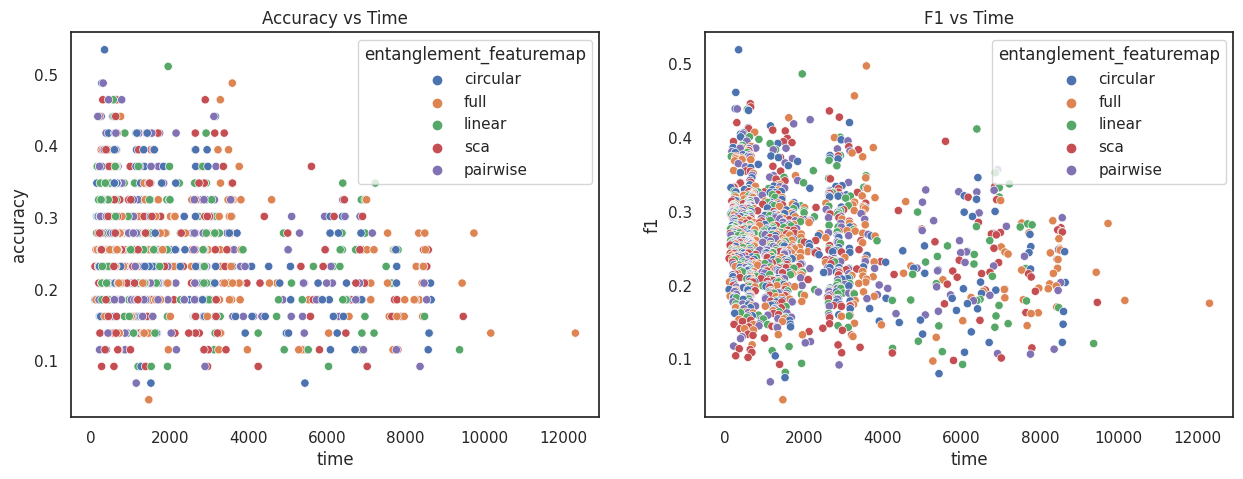

In [73]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='entanglement_featuremap', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='entanglement_featuremap', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [74]:
sca_runtime = res[res['entanglement_featuremap']=='sca'].set_index(index).sort_index()['time']
full_runtime = res[res['entanglement_featuremap']=='full'].set_index(index).sort_index()['time']
circular_runtime = res[res['entanglement_featuremap']=='circular'].set_index(index).sort_index()['time']
linear_runtime = res[res['entanglement_featuremap']=='linear'].set_index(index).sort_index()['time']
pairwise_runtime = res[res['entanglement_featuremap']=='pairwise'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(sca_runtime, full_runtime, circular_runtime, linear_runtime, pairwise_runtime).pvalue < 0.05)

for entanglement1 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
    for entanglement2 in ['sca', 'full', 'circular', 'linear', 'pairwise']:
        if entanglement1 != entanglement2:
            sign = wilcoxon(res[res['entanglement_featuremap']==entanglement1]['time'], res[res['entanglement_featuremap']==entanglement2]['time'], alternative='less').pvalue < 0.05
            if sign:
                print(f"{entanglement1}: significantly shorter than {entanglement2}", sign)

Significant Differences: True
sca: significantly shorter than full True
circular: significantly shorter than full True


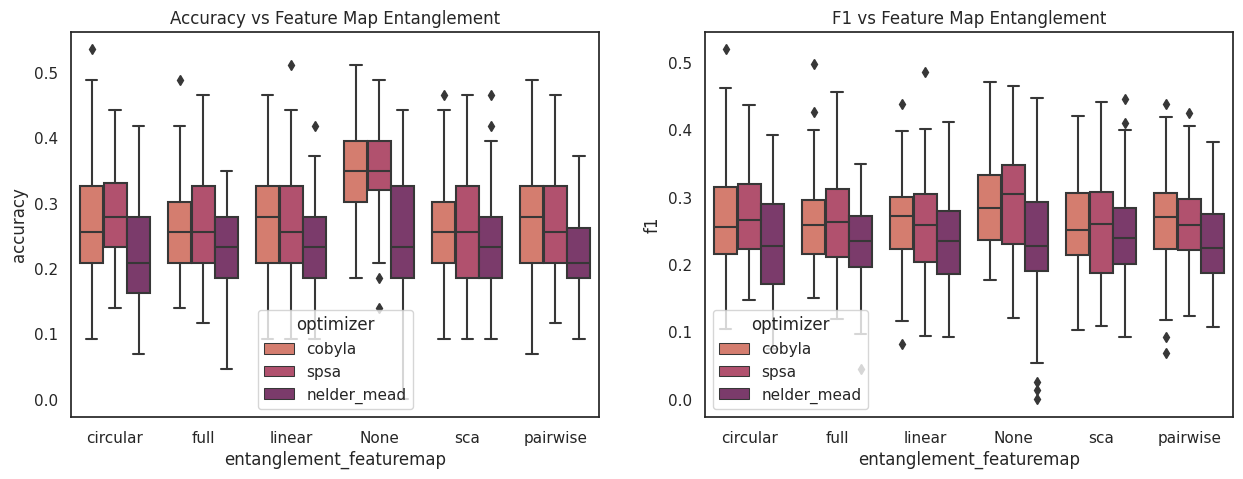

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


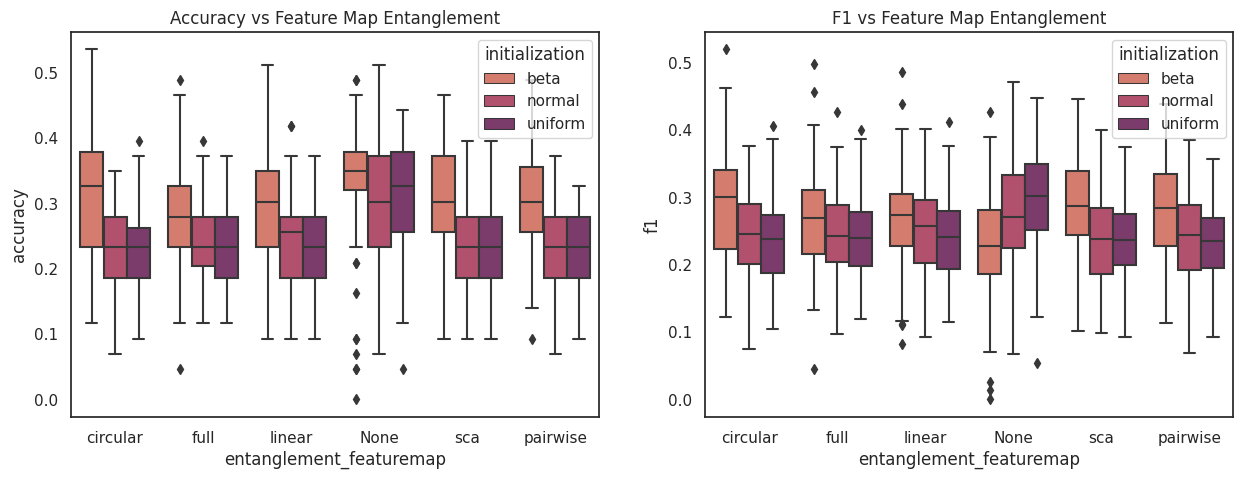

In [76]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
r = res_better.copy()
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=r, x='entanglement_featuremap', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Feature Map Entanglement')
ax[1].set_title('F1 vs Feature Map Entanglement')
plt.show()


### Preprocessing

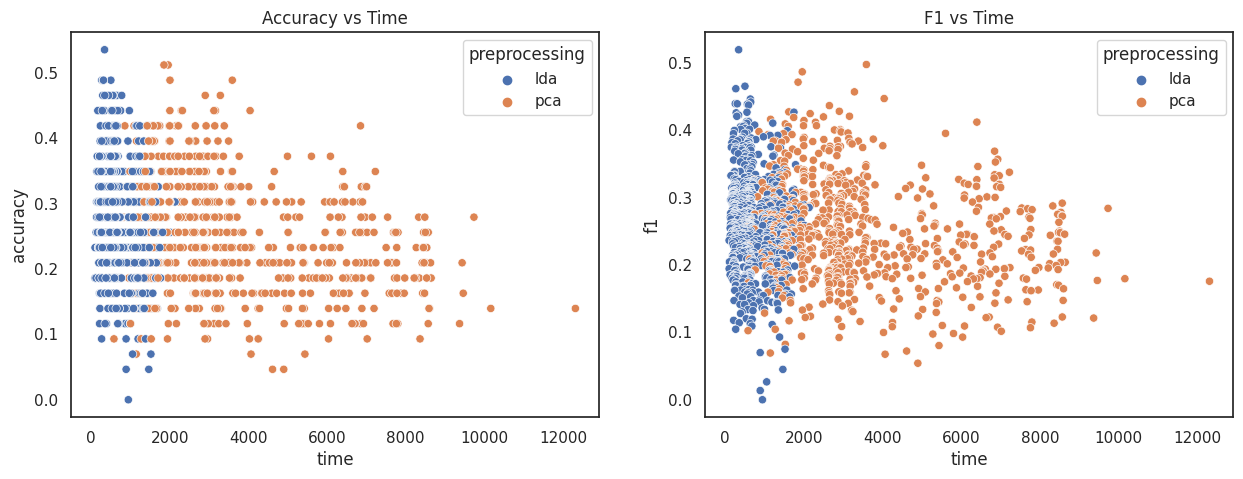

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='preprocessing', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='preprocessing', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [78]:
pca_runtime = res[res['preprocessing']=='pca'].set_index(index).sort_index()['time']
lda_runtime = res[res['preprocessing']=='lda'].set_index(index).sort_index()['time']

# significant differences in runtime
print("PCA significantly longer than LDA:", wilcoxon(pca_runtime, lda_runtime, alternative='greater').pvalue < 0.05)

PCA significantly longer than LDA: True


In [79]:
res.groupby(['preprocessing', 'optimizer'])[['iterations']].mean()

iterations
preprocessing optimizer              
lda           cobyla       110.269841
              nelder_mead  432.539683
              spsa         201.000000
pca           cobyla       136.440476
              nelder_mead  464.829365
              spsa         201.000000

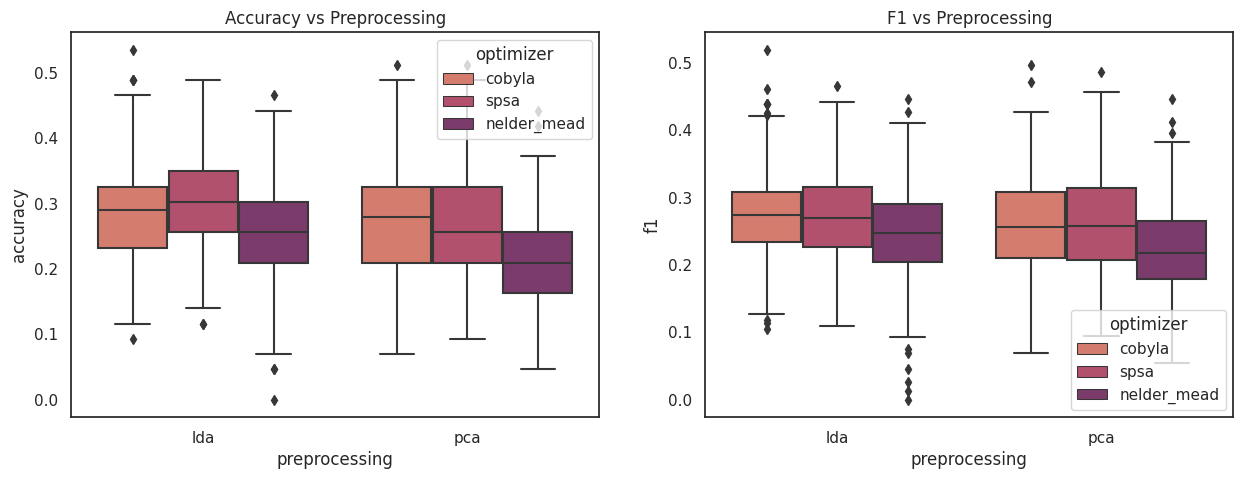

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='optimizer', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='optimizer', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

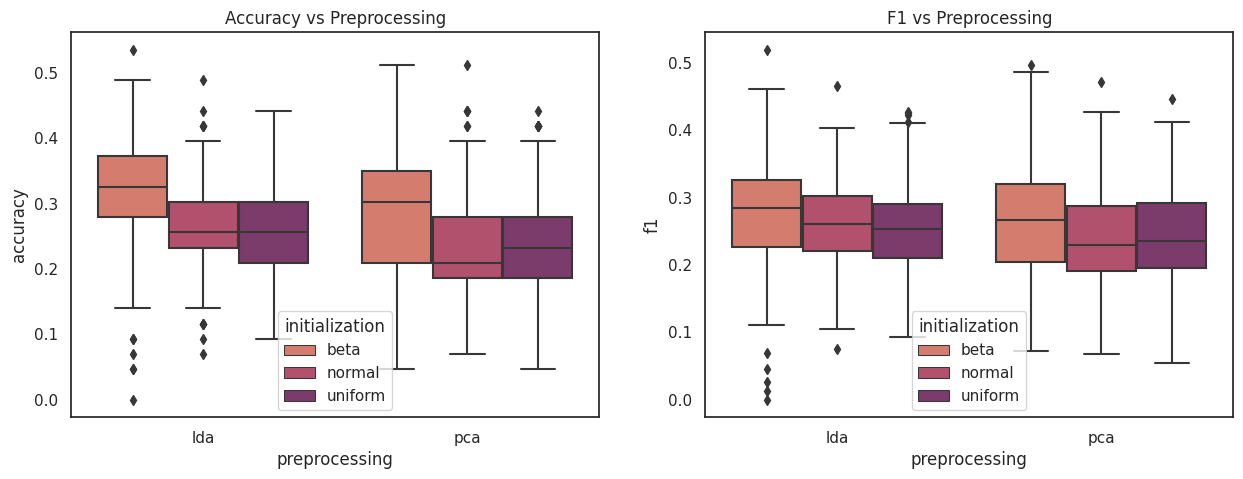

In [81]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=res_better, x='preprocessing', y='accuracy', hue='initialization', palette='flare', ax=ax[0])
sns.boxplot(data=res_better, x='preprocessing', y='f1', hue='initialization', palette='flare', ax=ax[1])
ax[0].set_title('Accuracy vs Preprocessing')
ax[1].set_title('F1 vs Preprocessing')
plt.show()

### Initialization

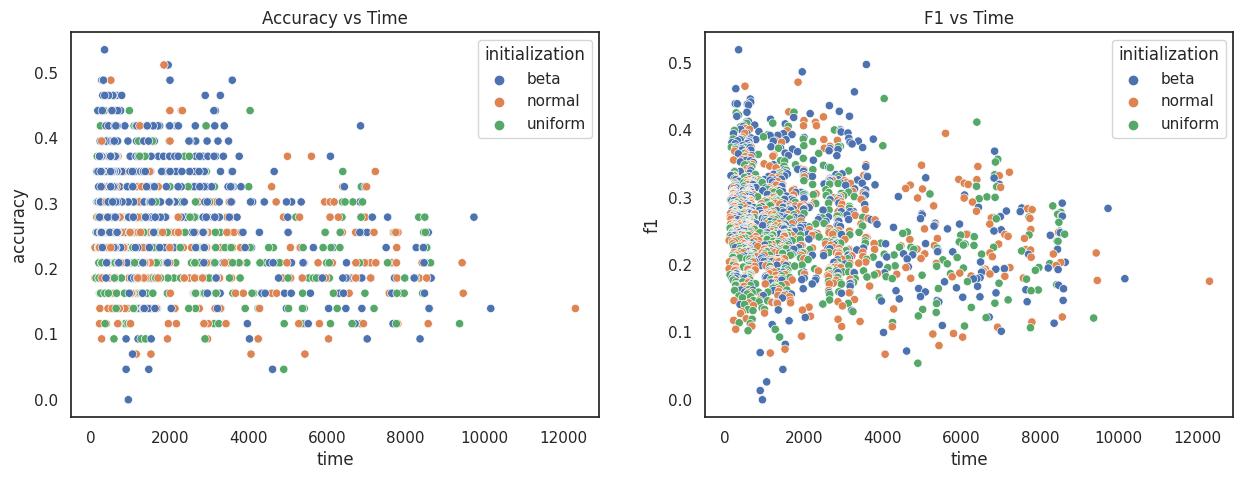

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(data=res_better, x='time', y='accuracy', hue='initialization', ax=ax[0])
sns.scatterplot(data=res_better, x='time', y='f1', hue='initialization', ax=ax[1])
ax[0].set_title('Accuracy vs Time')
ax[1].set_title('F1 vs Time')
plt.show()

In [83]:
beta = res[res['initialization']=='beta'].set_index(index).sort_index()['time']
normal = res[res['initialization']=='normal'].set_index(index).sort_index()['time']
uniform = res[res['initialization']=='uniform'].set_index(index).sort_index()['time']

# significant differences in runtime
print("Significant Differences:", friedmanchisquare(beta, normal, uniform).pvalue < 0.05)

print("Uniform significantly shorter than beta:", wilcoxon(uniform, beta, alternative='less').pvalue < 0.05)
print("Uniform significantly shorter than normal:", wilcoxon(uniform, normal, alternative='less').pvalue < 0.05)
print("Normal significantly shorter than beta:", wilcoxon(normal, beta, alternative='less').pvalue < 0.05)

Significant Differences: True
Uniform significantly shorter than beta: True
Uniform significantly shorter than normal: True
Normal significantly shorter than beta: True


In [84]:
res.groupby(['optimizer', 'initialization'])[['iterations', 'time']].mean()

iterations         time
optimizer   initialization                         
cobyla      beta            136.142857  1186.351622
            normal          117.029762  1027.591188
            uniform         116.892857  1020.937511
nelder_mead beta            444.101190  3643.216139
            normal          450.523810  3686.693053
            uniform         451.428571  3670.495895
spsa        beta            201.000000  1590.417154
            normal          201.000000  1595.967144
            uniform         201.000000  1589.004262

## Plot multiple variables

In [85]:
r = res_better.copy()
# replace all None with 'None'
r.loc[r['entanglement'].isna(), 'entanglement'] = 'None'
r.loc[r['entanglement_featuremap'].isna(), 'entanglement_featuremap'] = 'None'

### Time vs. Hyperparameters

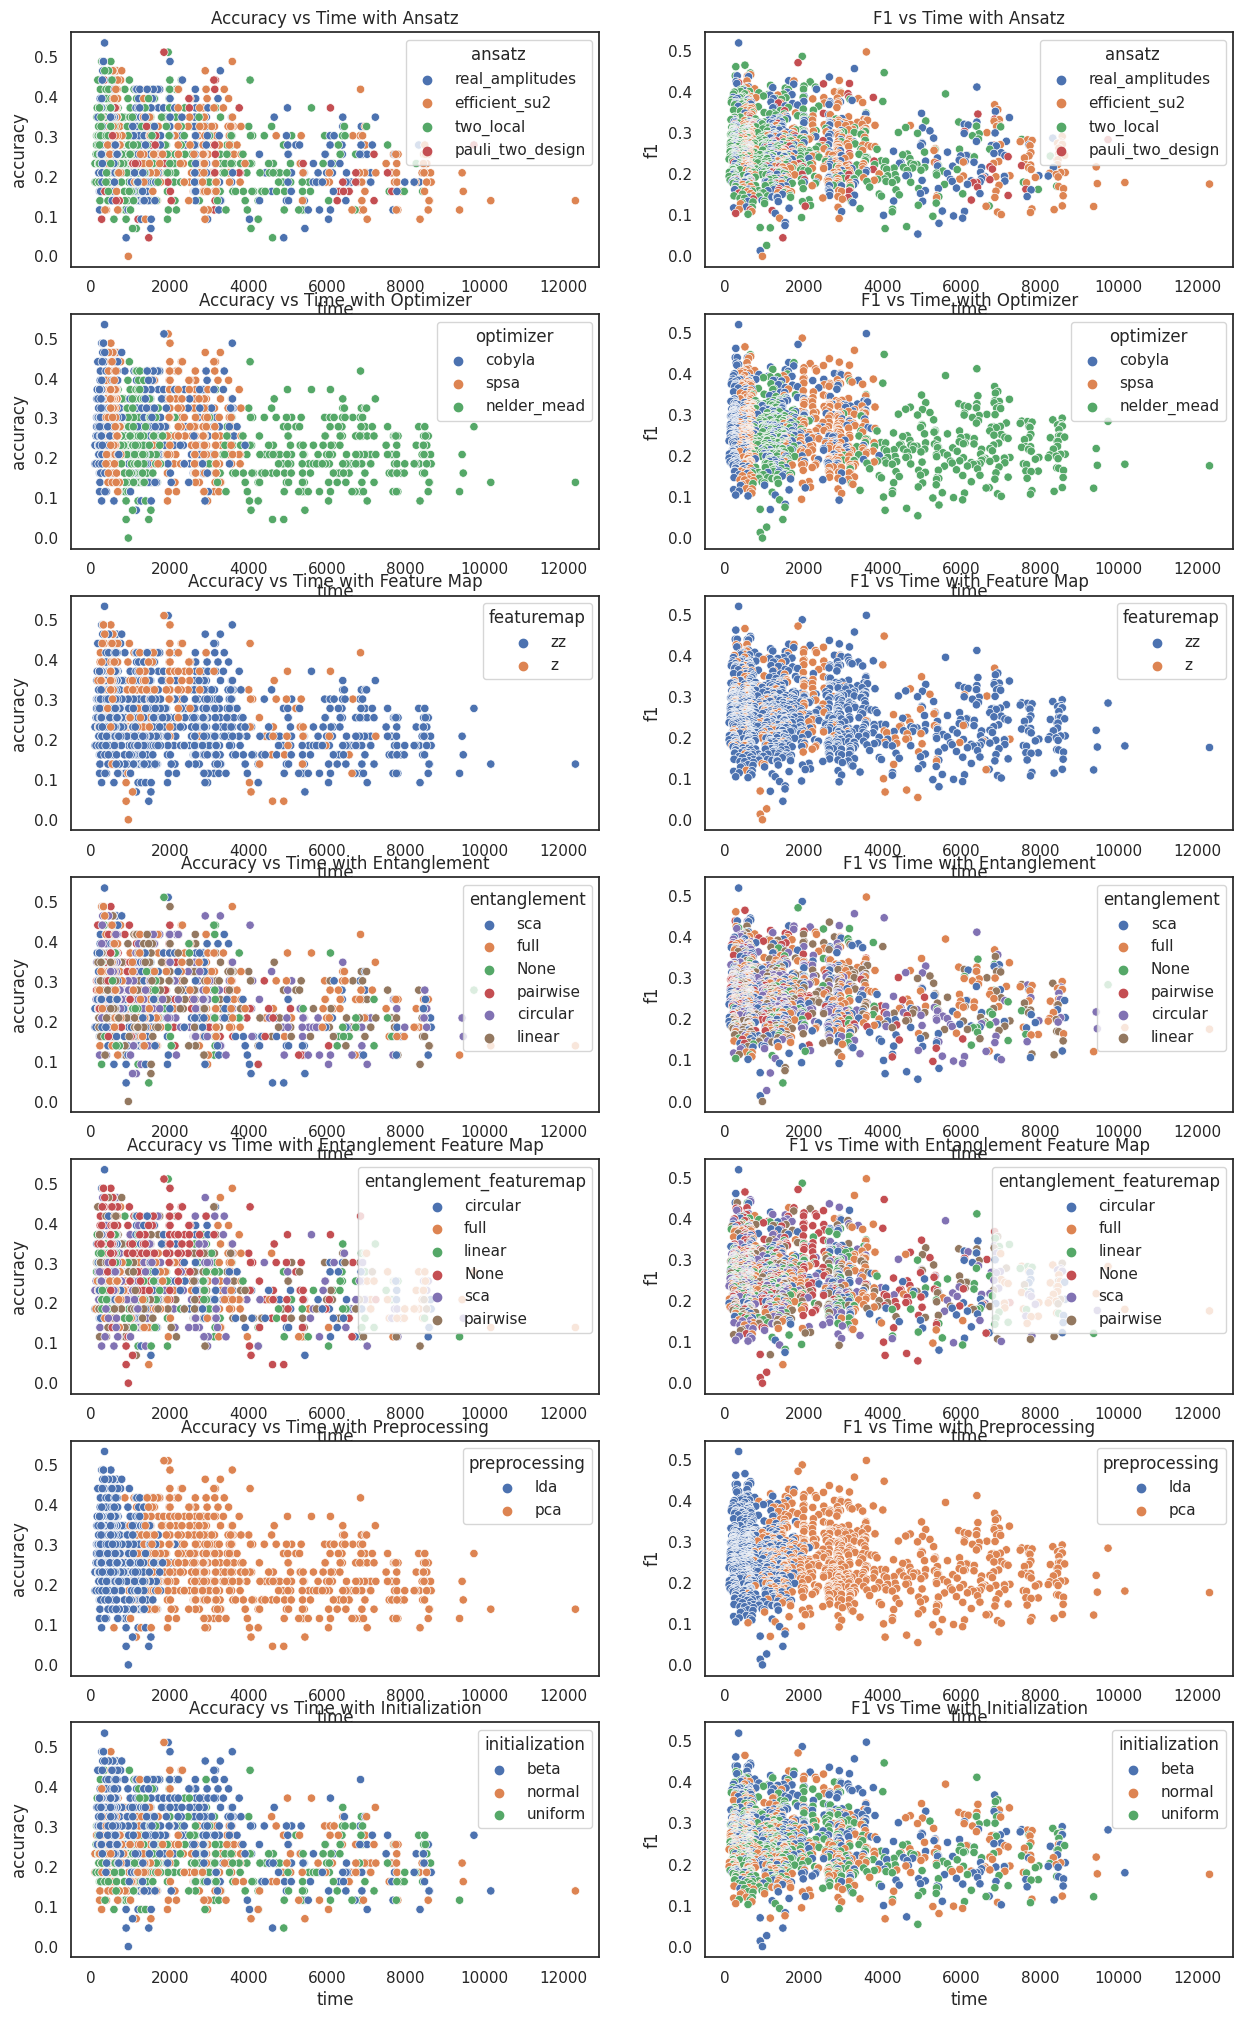

In [86]:
fig, ax = plt.subplots(7, 2, figsize=(15, 25))
sns.scatterplot(data=r, x='time', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement', palette='deep', ax=ax[3, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement', palette='deep', ax=ax[3, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[4, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='entanglement_featuremap', palette='deep', ax=ax[4, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='preprocessing', palette='deep', ax=ax[5, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='preprocessing', palette='deep', ax=ax[5, 1])
sns.scatterplot(data=r, x='time', y='accuracy', hue='initialization', palette='deep', ax=ax[6, 0])
sns.scatterplot(data=r, x='time', y='f1', hue='initialization', palette='deep', ax=ax[6, 1])
ax[0, 0].set_title('Accuracy vs Time with Ansatz')
ax[0, 1].set_title('F1 vs Time with Ansatz')
ax[2, 0].set_title('Accuracy vs Time with Feature Map')
ax[2, 1].set_title('F1 vs Time with Feature Map')
ax[3, 0].set_title('Accuracy vs Time with Entanglement')
ax[3, 1].set_title('F1 vs Time with Entanglement')
ax[4, 0].set_title('Accuracy vs Time with Entanglement Feature Map')
ax[4, 1].set_title('F1 vs Time with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Time with Optimizer')
ax[1, 1].set_title('F1 vs Time with Optimizer')
ax[5, 0].set_title('Accuracy vs Time with Preprocessing')
ax[5, 1].set_title('F1 vs Time with Preprocessing')
ax[6, 0].set_title('Accuracy vs Time with Initialization')
ax[6, 1].set_title('F1 vs Time with Initialization')
plt.show()

### Ansatz vs Accuracy/Time and additional parameters

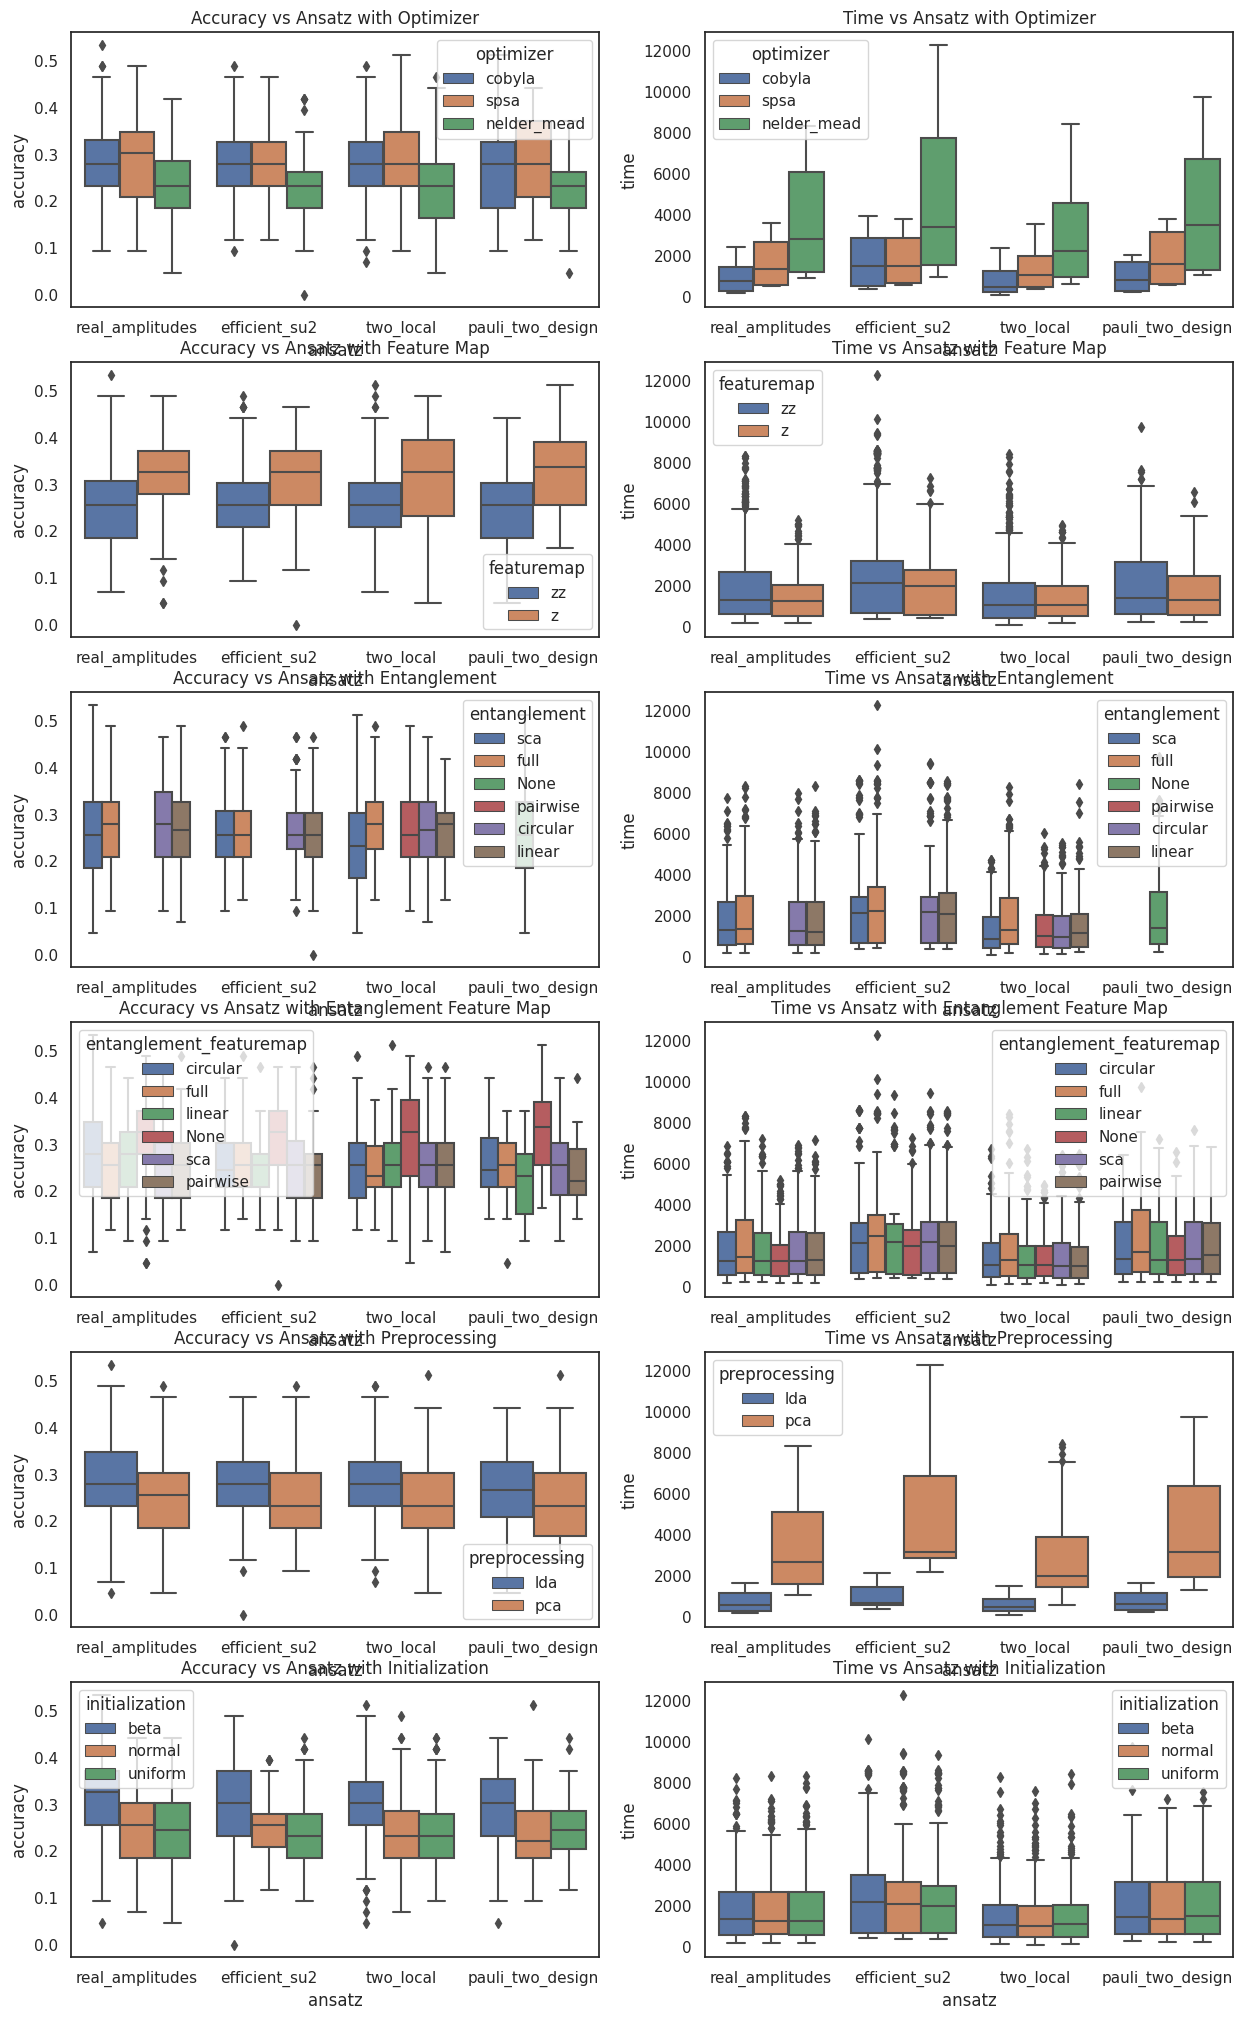

In [87]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='featuremap', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='featuremap', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='optimizer', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='optimizer', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='ansatz', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='ansatz', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[1, 0].set_title('Accuracy vs Ansatz with Feature Map')
ax[1, 1].set_title('Time vs Ansatz with Feature Map')
ax[2, 0].set_title('Accuracy vs Ansatz with Entanglement')
ax[2, 1].set_title('Time vs Ansatz with Entanglement')
ax[3, 0].set_title('Accuracy vs Ansatz with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Ansatz with Entanglement Feature Map')
ax[0, 0].set_title('Accuracy vs Ansatz with Optimizer')
ax[0, 1].set_title('Time vs Ansatz with Optimizer')
ax[4, 0].set_title('Accuracy vs Ansatz with Preprocessing')
ax[4, 1].set_title('Time vs Ansatz with Preprocessing')
ax[5, 0].set_title('Accuracy vs Ansatz with Initialization')
ax[5, 1].set_title('Time vs Ansatz with Initialization')
plt.show()


### FeatureMap vs. Accuracy/Time and additional parameters

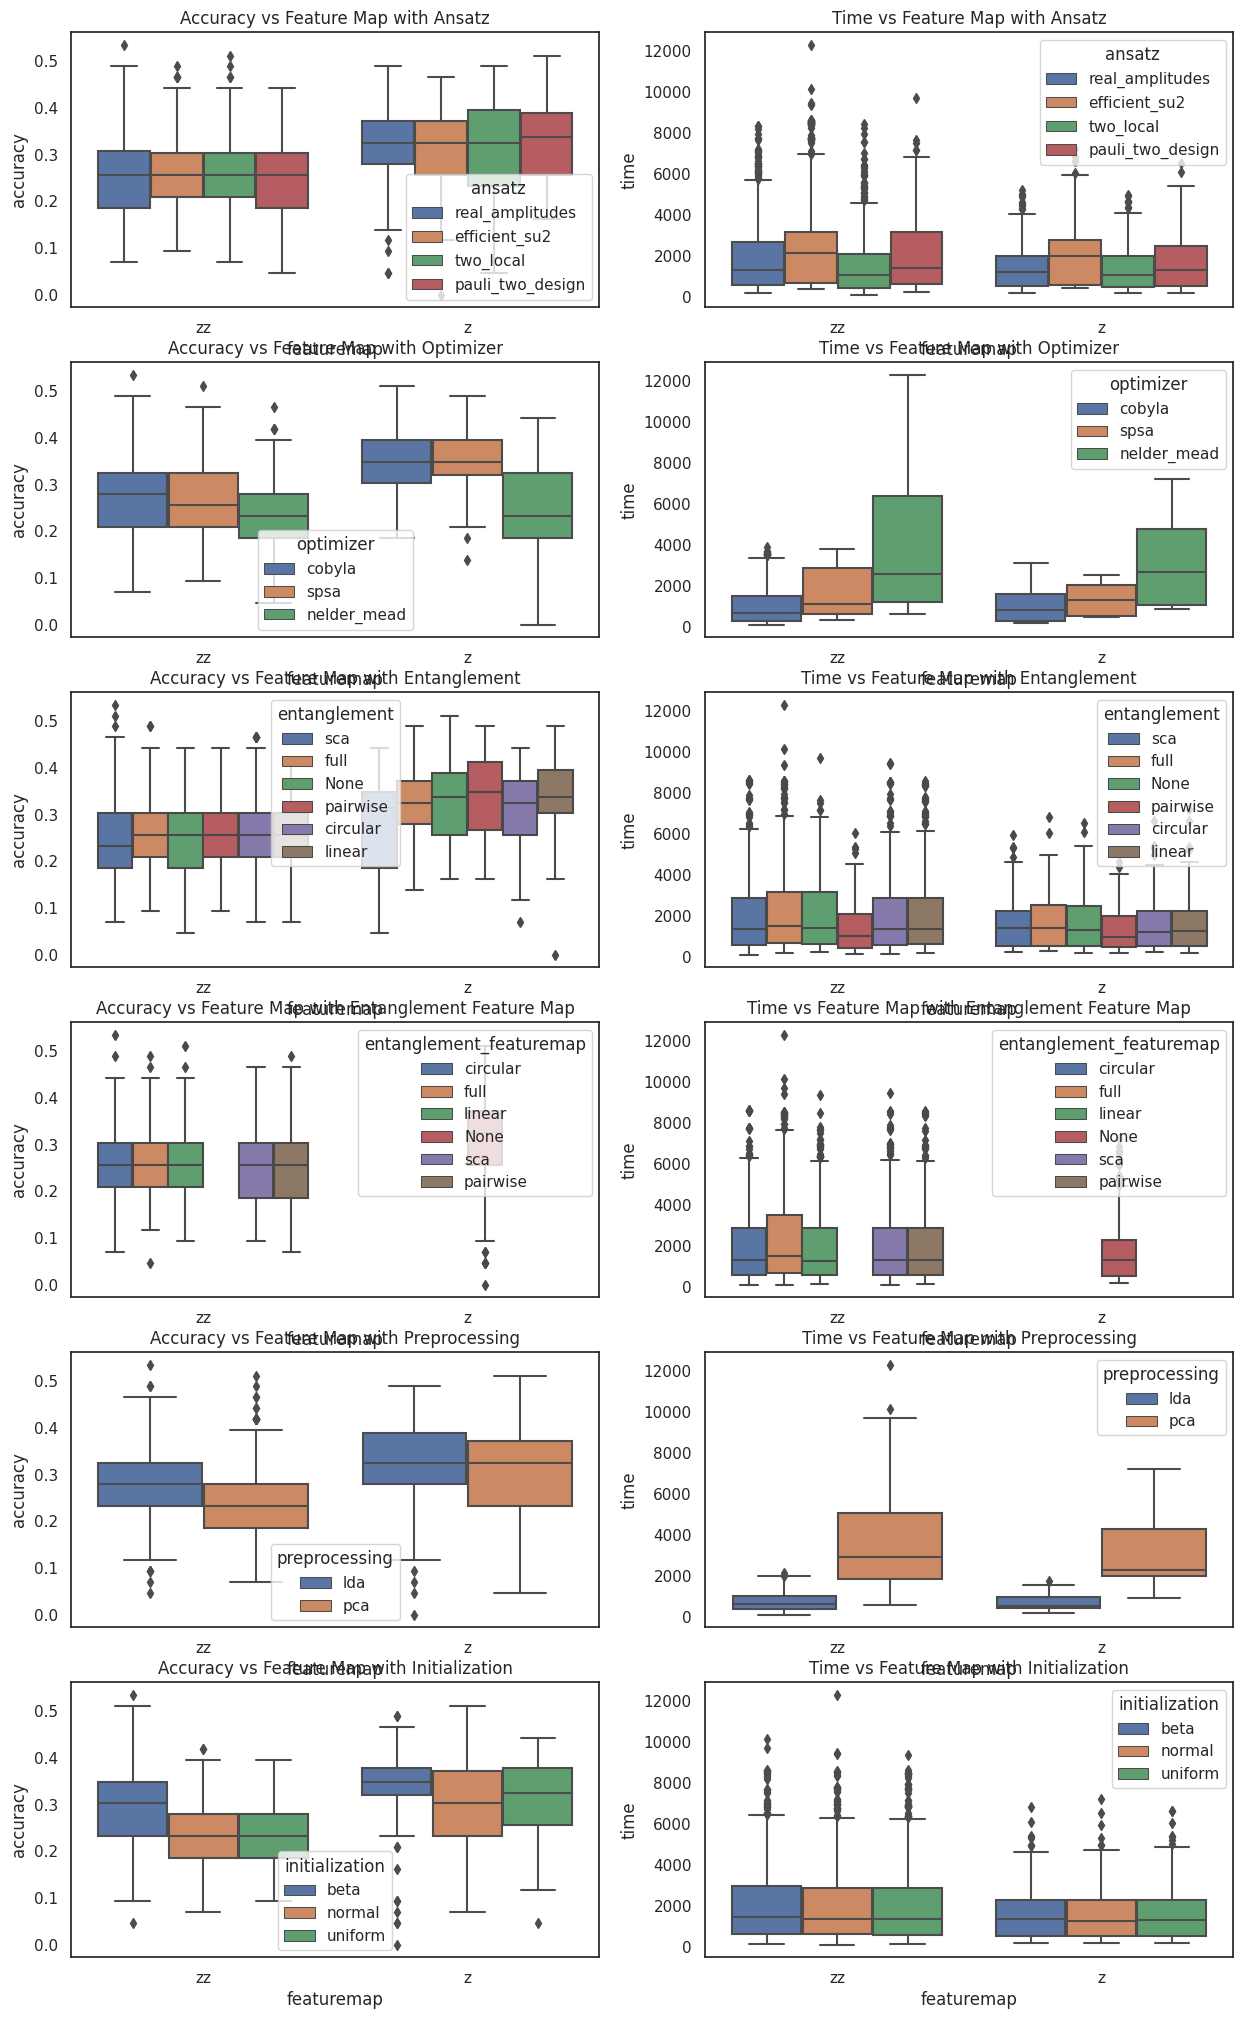

In [88]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map with Ansatz')
ax[0, 1].set_title('Time vs Feature Map with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map with Entanglement')
ax[2, 1].set_title('Time vs Feature Map with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Feature Map with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map with Optimizer')
ax[1, 1].set_title('Time vs Feature Map with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map with Initialization')
ax[5, 1].set_title('Time vs Feature Map with Initialization')
plt.show()

### Entanglement vs Accuracy/Time and additional parameters

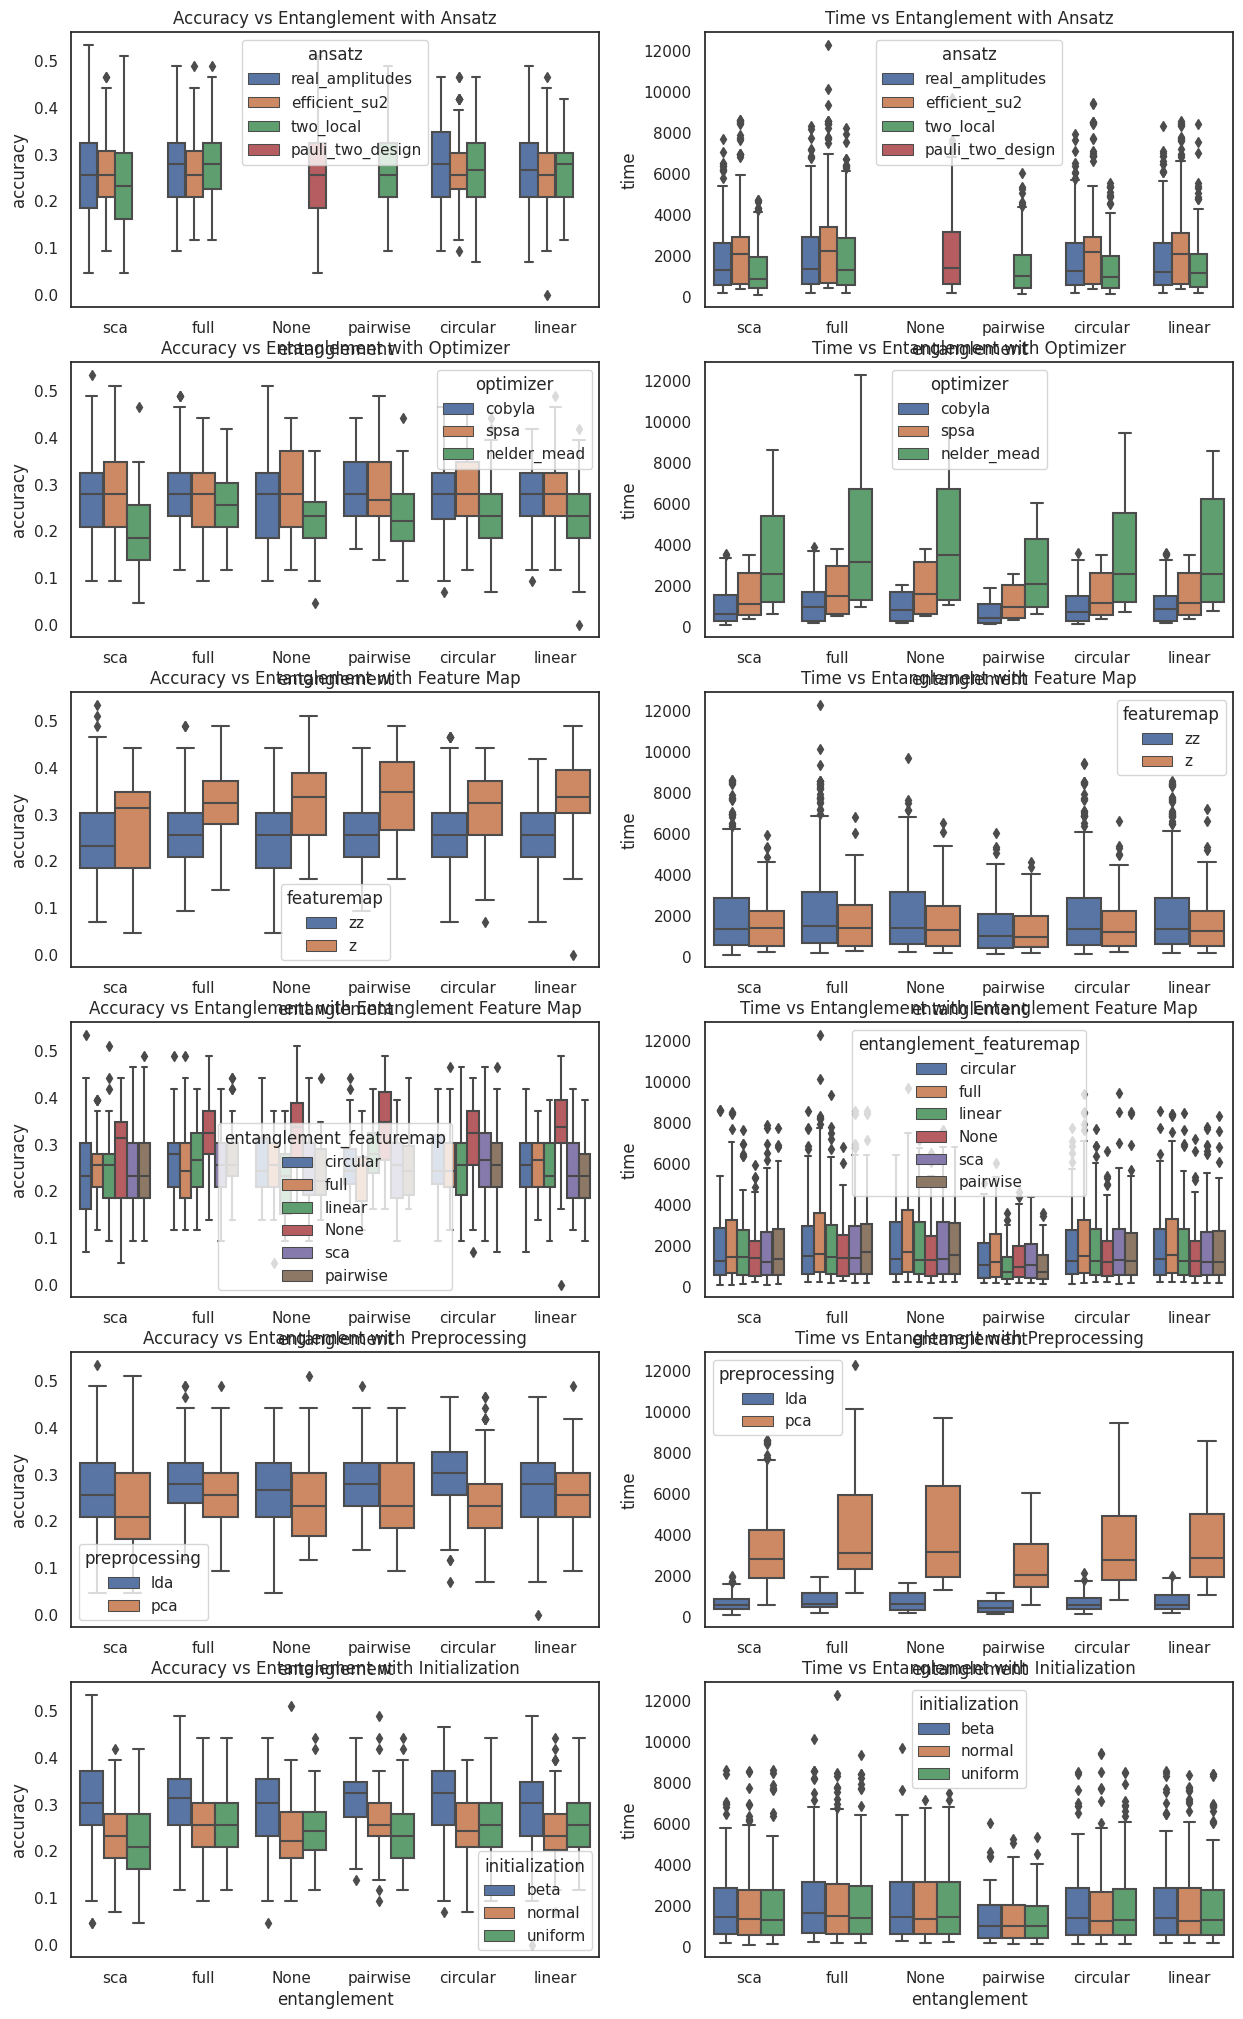

In [89]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='featuremap', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='featuremap', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='entanglement_featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='entanglement_featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Entanglement with Feature Map')
ax[2, 1].set_title('Time vs Entanglement with Feature Map')
ax[3, 0].set_title('Accuracy vs Entanglement with Entanglement Feature Map')
ax[3, 1].set_title('Time vs Entanglement with Entanglement Feature Map')
ax[1, 0].set_title('Accuracy vs Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Entanglement with Initialization')
ax[5, 1].set_title('Time vs Entanglement with Initialization')
plt.show()


### FeatureMap Entanglement vs. Accuracy/Time and additional parameters

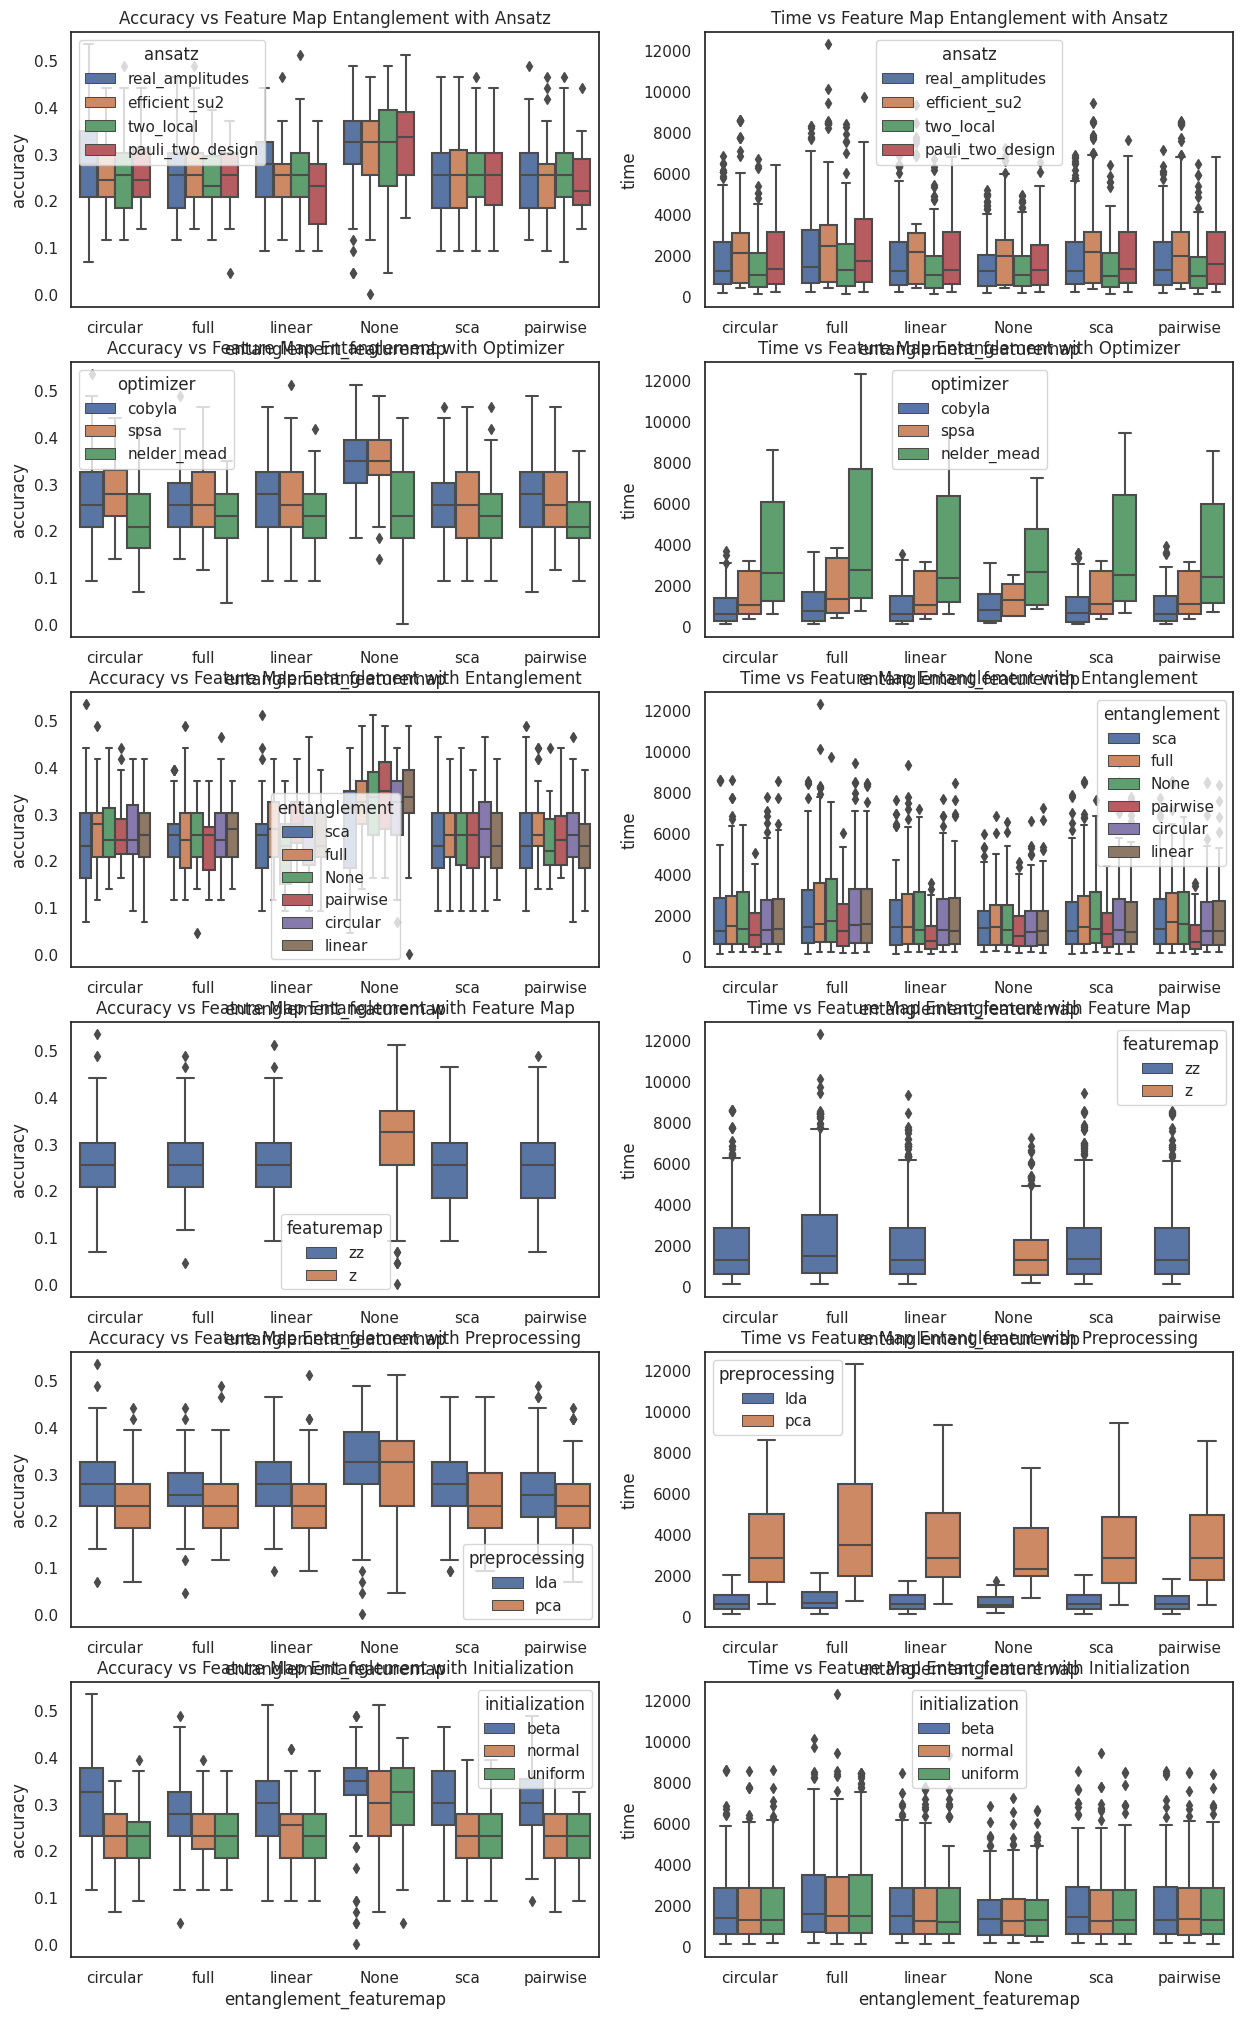

In [90]:
fig, ax = plt.subplots(6, 2, figsize=(15, 25))
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='ansatz', palette='deep', ax=ax[0, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='ansatz', palette='deep', ax=ax[0, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='entanglement', palette='deep', ax=ax[2, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='entanglement', palette='deep', ax=ax[2, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='featuremap', palette='deep', ax=ax[3, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='featuremap', palette='deep', ax=ax[3, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='optimizer', palette='deep', ax=ax[1, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='optimizer', palette='deep', ax=ax[1, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='preprocessing', palette='deep', ax=ax[4, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='preprocessing', palette='deep', ax=ax[4, 1])
sns.boxplot(data=r, x='entanglement_featuremap', y='accuracy', hue='initialization', palette='deep', ax=ax[5, 0])
sns.boxplot(data=r, x='entanglement_featuremap', y='time', hue='initialization', palette='deep', ax=ax[5, 1])
ax[0, 0].set_title('Accuracy vs Feature Map Entanglement with Ansatz')
ax[0, 1].set_title('Time vs Feature Map Entanglement with Ansatz')
ax[2, 0].set_title('Accuracy vs Feature Map Entanglement with Entanglement')
ax[2, 1].set_title('Time vs Feature Map Entanglement with Entanglement')
ax[3, 0].set_title('Accuracy vs Feature Map Entanglement with Feature Map')
ax[3, 1].set_title('Time vs Feature Map Entanglement with Feature Map')
ax[1, 0].set_title('Accuracy vs Feature Map Entanglement with Optimizer')
ax[1, 1].set_title('Time vs Feature Map Entanglement with Optimizer')
ax[4, 0].set_title('Accuracy vs Feature Map Entanglement with Preprocessing')
ax[4, 1].set_title('Time vs Feature Map Entanglement with Preprocessing')
ax[5, 0].set_title('Accuracy vs Feature Map Entanglement with Initialization')
ax[5, 1].set_title('Time vs Feature Map Entanglement with Initialization')
plt.show()

## Analyze Worst
* Only Nelson-Mead and (few) SPSA configurations
* A lot of ZFeatureMap, compared to ZZ
* More LDA than PCA ones

In [91]:
worst.groupby(['optimizer'])['accuracy'].count()/res.groupby(['optimizer'])['accuracy'].count()

optimizer
cobyla         0.011905
nelder_mead    0.035714
spsa           0.003968
Name: accuracy, dtype: float64

In [92]:
worst.groupby(['ansatz'])['accuracy'].count()/res.groupby(['ansatz'])['accuracy'].count()

ansatz
efficient_su2       0.011574
pauli_two_design    0.027778
real_amplitudes     0.020833
two_local           0.016667
Name: accuracy, dtype: float64

In [93]:
worst.groupby(['featuremap'])['accuracy'].count()/res.groupby(['featuremap'])['accuracy'].count()

featuremap
z     0.031746
zz    0.014286
Name: accuracy, dtype: float64

In [94]:
worst.groupby(['entanglement'])['accuracy'].count()/res.groupby(['entanglement'])['accuracy'].count()

entanglement
circular    0.015432
full        0.003086
linear      0.012346
pairwise    0.009259
sca         0.037037
Name: accuracy, dtype: float64

In [95]:
worst.groupby(['ansatz', 'entanglement'])['accuracy'].count()/res.groupby(['ansatz', 'entanglement'])['accuracy'].count()

ansatz           entanglement
efficient_su2    circular        0.009259
                 full                 NaN
                 linear          0.018519
                 sca             0.018519
real_amplitudes  circular        0.018519
                 full            0.009259
                 linear          0.018519
                 sca             0.037037
two_local        circular        0.018519
                 full                 NaN
                 linear               NaN
                 pairwise        0.009259
                 sca             0.055556
Name: accuracy, dtype: float64

In [96]:
worst.groupby(['entanglement_featuremap'])['accuracy'].count()/res.groupby(['entanglement_featuremap'])['accuracy'].count()

entanglement_featuremap
circular    0.011905
full        0.003968
linear      0.019841
pairwise    0.011905
sca         0.023810
Name: accuracy, dtype: float64

In [97]:
worst.groupby(['preprocessing'])['accuracy'].count()/res.groupby(['preprocessing'])['accuracy'].count()

preprocessing
lda    0.011905
pca    0.022487
Name: accuracy, dtype: float64

In [98]:
worst.groupby(['initialization'])['accuracy'].count()/res.groupby(['initialization'])['accuracy'].count()

initialization
beta       0.021825
normal     0.017857
uniform    0.011905
Name: accuracy, dtype: float64

# Plot

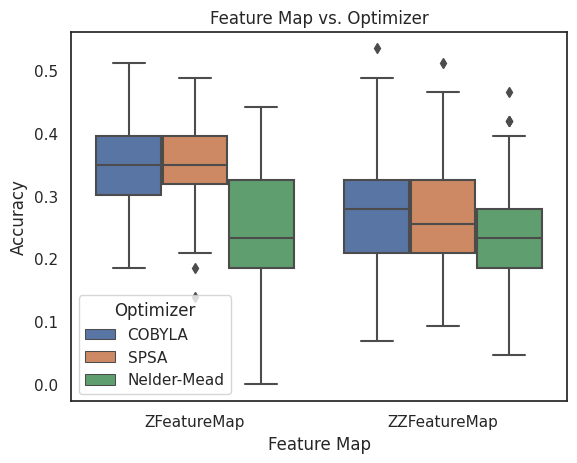

In [99]:
sns.boxplot(data=res, x='featuremap', y='accuracy', hue='optimizer', palette='deep', order=['z', 'zz'], hue_order=['cobyla', 'spsa', 'nelder_mead'])
plt.title('Feature Map vs. Optimizer')
plt.xlabel("Feature Map")
plt.ylabel("Accuracy")
f = plt.legend(title="Optimizer")
for text in f.get_texts():
    if text.get_text() == 'cobyla':
        text.set_text('COBYLA')
    elif text.get_text() == 'spsa':
        text.set_text('SPSA')
    elif text.get_text() == 'nelder_mead':
        text.set_text('Nelder-Mead')
plt.xticks([0, 1], ['ZFeatureMap', 'ZZFeatureMap'])
# plt.savefig("../reports/figures/kdd_featmap_opt.png", bbox_inches='tight')
plt.show()